# **ML Project**
## *Nicole Shklover (322605601)* <br> *Inbar Rodan (319058251)*


# Imports

In [1]:
#Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score,roc_curve, RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# Reading the data

In [2]:
train_data = pd.read_csv('train.csv')
train_data_copy = train_data.copy()

test_data = pd.read_csv('test.csv')
test_data_copy = test_data.copy()

In [3]:
train_data_copy

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh,1
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4511a131862a42b993277500b69e1694501873fc9504e5...,960994,2072576.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,14.0,22902.0,5.704110,Win32 Executable (generic),42.7,-0.841281,6.554416,NaN,1
59996,493fdfc874ca322412766663e54491115ba64f92014a43...,1790976,1810432.0,189.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,12.0,31784.0,7.694021,Win64 Executable (generic),32.2,NaN,6.410081,vh,1
59997,2003985f4f05aba9849383bc945c707b5da1e2fa38a6ae...,9778,40960.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,566.0,7.447368,DOS Executable Generic,100.0,0.758878,5.959035,bf,1
59998,7ea972b22a4aa8f1ccf454279cafc69b0431e82be568a9...,110256,106496.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,6180.0,14.714286,Win32 Dynamic Link Library (generic),34.2,-3.543615,5.561191,er,0


In [4]:
test_data_copy

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C
0,023928c14abe04196d45bb4578b8fa0eb02189898ce93b...,964814,2072576.0,2.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,14.0,22934.0,5.703556,Win32 Executable (generic),42.7,-1.414118,6.554459,er
1,6436083d4eed84436768d66829b961927eeb9de2e6657f...,116736,200704.0,136.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,7445.0,20.397260,Win32 Executable MS Visual C++ (generic),48.8,NaN,5.581053,cs
2,038e71f41fdc5edb3a7afc112fb0679a4a5d6d94512055...,3091456,118784.0,124.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,9.0,148608.0,11.072796,InstallShield setup,24.1,-1.713507,6.103680,vh
3,be913ef29b4566e7817a5ab2c4a4289a455e9b562e1da0...,1249792,1257472.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,0.0,2.0,121156.0,18.679618,Win32 Executable (generic),33.1,9.215390,5.418556,vh
4,e78f83f0af4f1fbcf8fffd562b4734701483818078bf0e...,2117632,2142208.0,165.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,21562.0,7.528631,Win32 Executable Microsoft Visual Basic 6,84.4,2.224768,NaN,er
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,977bc37677535028ae8bc98a585e05e59dcf2c4cb55636...,1425920,1449984.0,74.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,32.0,51265.0,7.618517,Win32 Executable MS Visual C++ (generic),41.0,-6.437913,6.456720,vh
17996,2c4c5ab9fc53e99f6416547ca9659f954a4af84008b801...,118784,126976.0,11.0,0.0,NaN,0.0,1.0,0.0,0.0,...,10.0,0.0,1.0,11596.0,21.045372,Win32 Executable Microsoft Visual Basic 6,88.6,1.020802,3.790722,cs
17997,7bd4c102d52df73710982d29ebf3c68bc2d249459fc536...,249520,245760.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,21.0,0.0,1.0,87901.0,28.227681,Win32 Dynamic Link Library (generic),34.2,4.970046,4.587264,er
17998,4228f0379f41d4b2d50643885474ac77a3ff1719971812...,18944,40960.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,5009.0,18.083032,"Generic CIL Executable (.NET, Mono, etc.)",71.1,NaN,5.119472,gow


# Part 1

## Feature exploration


### Statistics of all features

In [5]:
train_data.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,...,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,label
count,6.000000e+04,5.806500e+04,58261.000000,57907.000000,57073.000000,56676.000000,58039.000000,58063.000000,57102.000000,57344.000000,...,56340.000000,57651.000000,57475.000000,56911.000000,5.726100e+04,57243.000000,60000.000000,56296.000000,56249.000000,60000.000000
mean,1.501019e+06,1.965704e+06,106.195671,30.803271,0.403764,0.543069,0.860456,0.254189,0.234195,40.172468,...,1.644799,12.501292,0.429282,16.263429,1.207710e+05,32.658511,53.678748,4.015404,5.810361,0.500000
std,4.727391e+06,2.017881e+07,213.452315,508.079533,0.490655,0.498146,0.346516,0.435408,0.423498,1239.701661,...,37.003752,71.631716,11.496862,82.193088,6.052203e+05,1094.710748,20.632479,6.368440,0.641208,0.500004
min,2.980000e+02,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,5.000000e+00,5.000000,17.500000,-17.783199,0.004929,0.000000
25%,1.070080e+05,1.228800e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.013000e+03,7.447368,38.400000,-0.293525,5.469978,0.000000
50%,4.833280e+05,4.218880e+05,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,2.283500e+04,12.009456,43.300000,3.658333,5.856659,0.500000
75%,1.239326e+06,1.601536e+06,152.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,10.000000,0.000000,11.000000,7.615600e+04,17.310647,69.100000,7.863973,6.344090,1.000000
max,3.253537e+08,4.278288e+09,15047.000000,48840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,181660.000000,...,5324.000000,9387.000000,2492.000000,7010.000000,5.034687e+07,207990.925620,100.000000,43.926598,6.584937,1.000000


### Exploring missing values

In [6]:
#Find out about missing values
train_data_copy.isnull().sum()

sha256                    0
size                      0
vsize                  1935
imports                1739
exports                2093
has_debug              2927
has_relocations        3324
has_resources          1961
has_signature          1937
has_tls                2898
symbols                2656
numstrings             2718
paths                  3660
urls                   2349
registry               2525
MZ                     3089
printables             2739
avlength               2757
file_type_trid            0
file_type_prob_trid       0
A                      3704
B                      3751
C                      2051
label                     0
dtype: int64

### Feature distribution

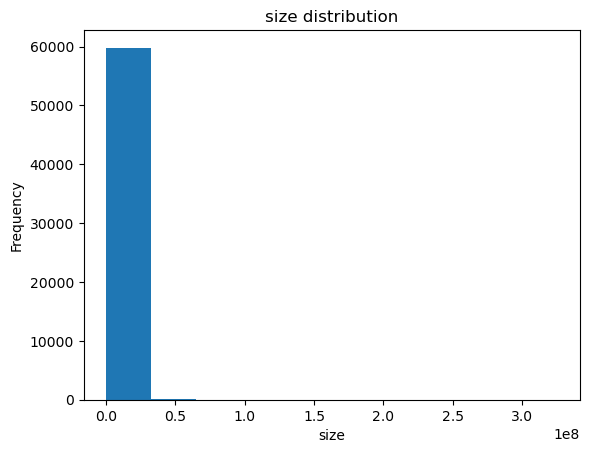

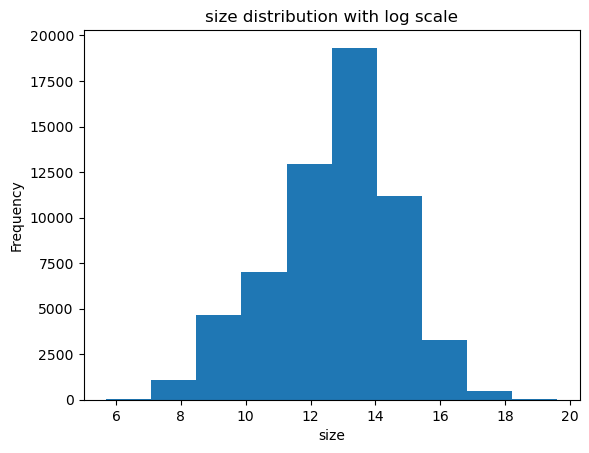

In [7]:
train_data_copy['size'].plot.hist()
plt.title('size distribution')
plt.xlabel("size")
plt.show()

(np.log(train_data_copy['size'])).plot.hist()
plt.title('size distribution with log scale')
plt.xlabel("size")
plt.show()

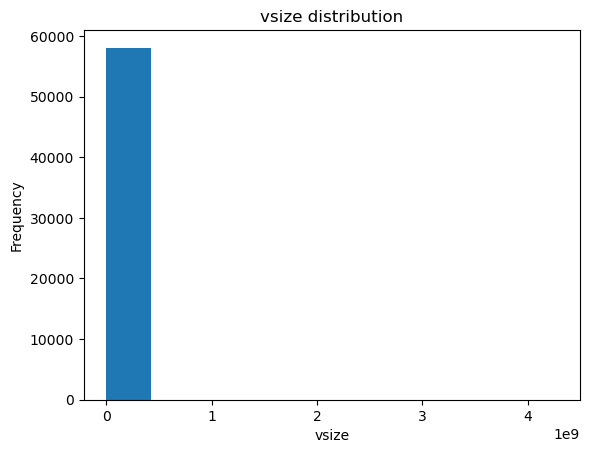

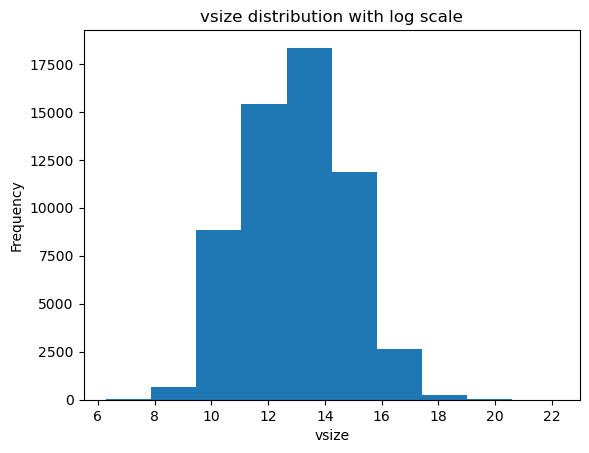

In [8]:
train_data_copy['vsize'].plot.hist()
plt.title('vsize distribution')
plt.xlabel("vsize")
plt.show()

(np.log(train_data_copy['vsize'])).plot.hist()
plt.title('vsize distribution with log scale')
plt.xlabel("vsize")
plt.show()

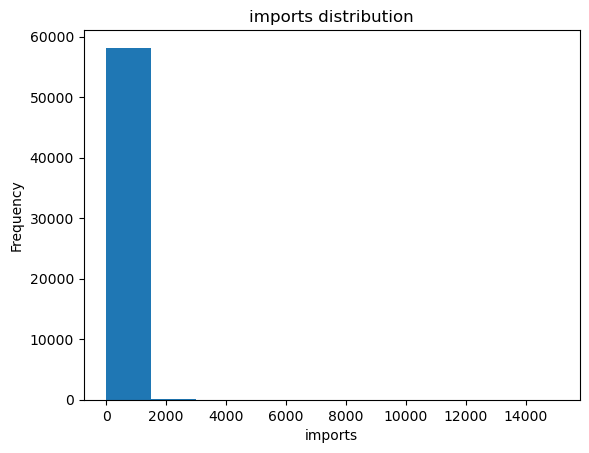

number of samples equal/above 2000: 60


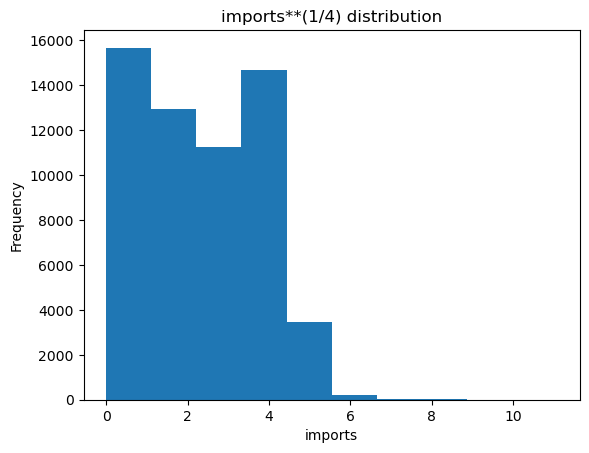

In [9]:
train_data_copy['imports'].plot.hist()
plt.title('imports distribution')
plt.xlabel("imports")
plt.show()
print("number of samples equal/above 2000:",(train_data_copy['imports']>=2000).sum()) #we think the samples are outliers

np.sqrt(np.sqrt(train_data_copy['imports'])).plot.hist()
plt.title('imports**(1/4) distribution')
plt.xlabel("imports")
plt.show()

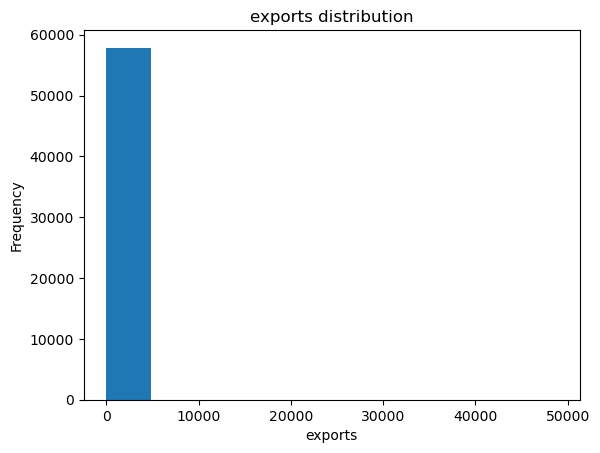

number of samples equal/above 5000: 53


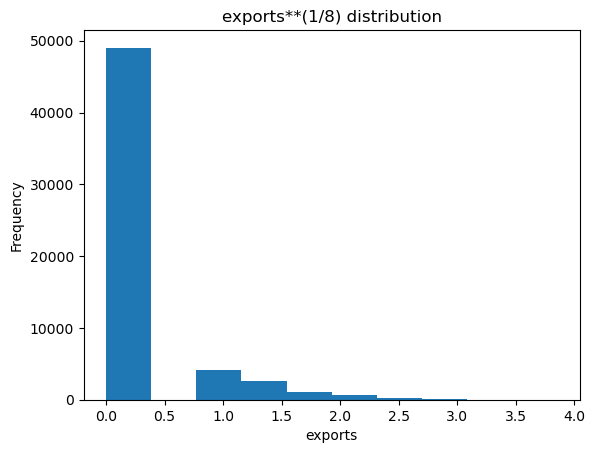

In [10]:
train_data_copy['exports'].plot.hist()
plt.title('exports distribution')
plt.xlabel("exports")
plt.show()
print("number of samples equal/above 5000:",(train_data_copy['exports']>=5000).sum()) #we think the samples are outliers

np.sqrt(np.sqrt(np.sqrt(train_data_copy['exports']))).plot.hist()
plt.title('exports**(1/8) distribution')
plt.xlabel("exports")
plt.show()

<Axes: xlabel='has_debug', ylabel='count'>

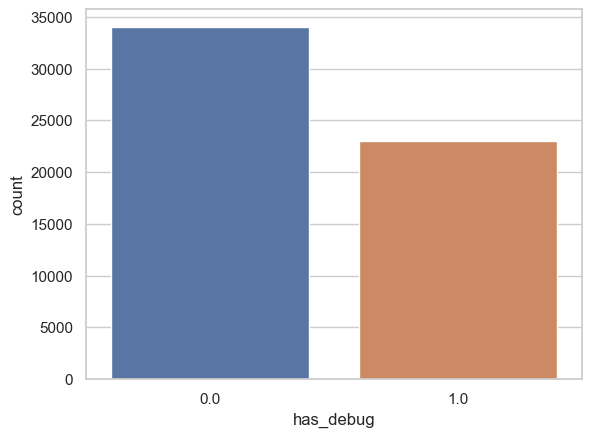

In [11]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["has_debug"])

<Axes: xlabel='has_tls', ylabel='count'>

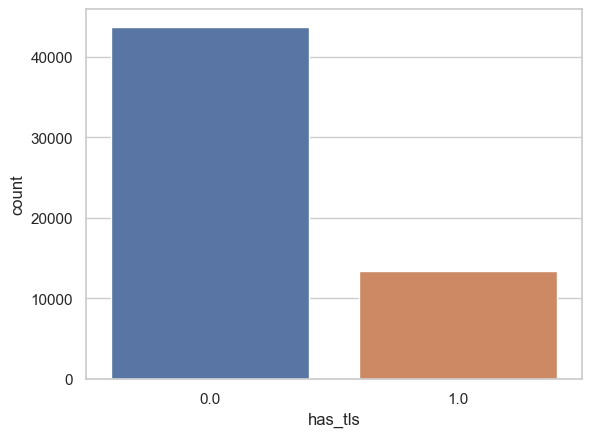

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["has_tls"])

<Axes: xlabel='has_resources', ylabel='count'>

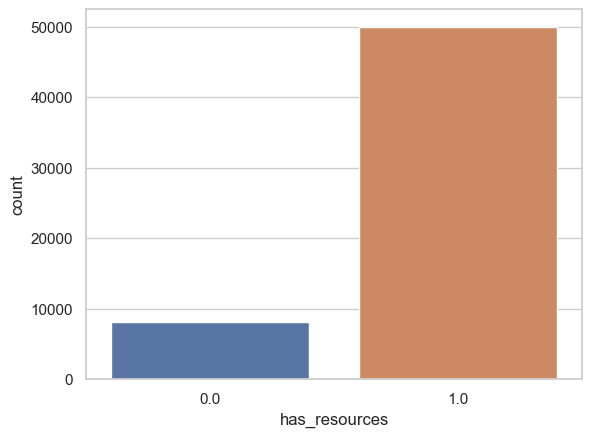

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["has_resources"])

<Axes: xlabel='has_relocations', ylabel='count'>

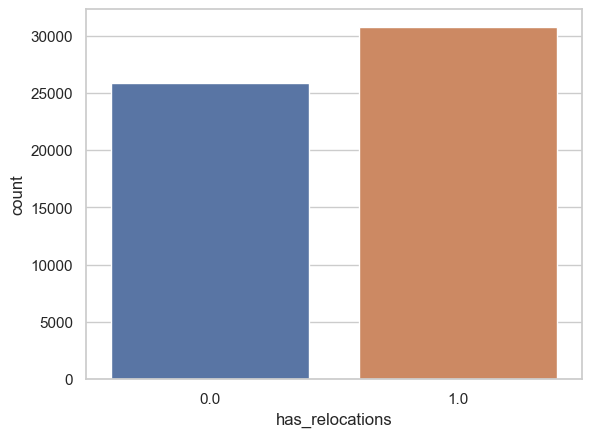

In [14]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["has_relocations"])

<Axes: xlabel='has_signature', ylabel='count'>

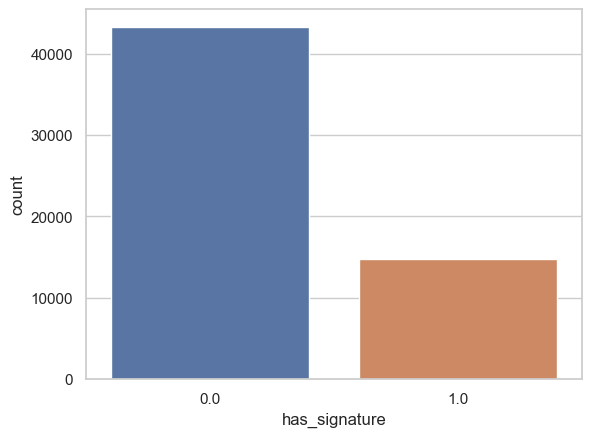

In [15]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["has_signature"])

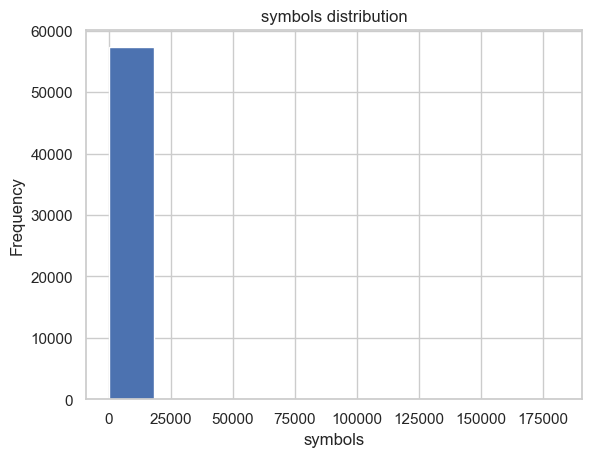

Value count for the symbols:

0.0         56767
3.0            63
4.0             9
3644.0          6
1080.0          4
            ...  
109.0           1
13118.0         1
191.0           1
26.0            1
181660.0        1
Name: symbols, Length: 415, dtype: int64


In [16]:
train_data_copy['symbols'].plot.hist()
plt.title('symbols distribution')
plt.xlabel("symbols")
plt.show()
print("Value count for the symbols:\n")
print(train_data_copy['symbols'].value_counts())


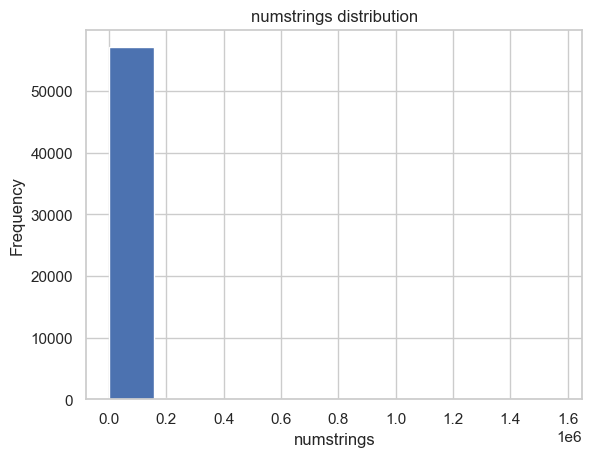

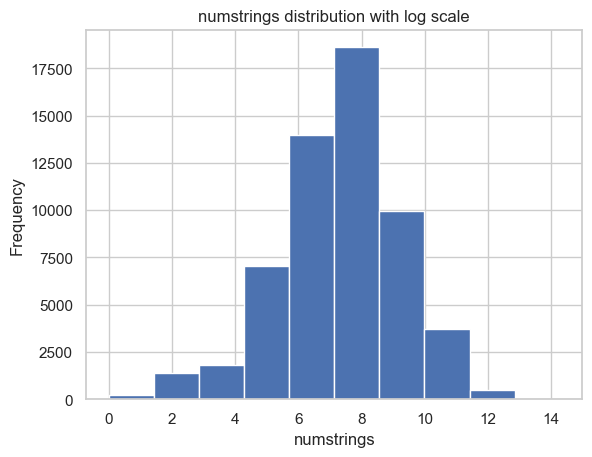

In [17]:
train_data_copy['numstrings'].plot.hist()
plt.title('numstrings distribution')
plt.xlabel("numstrings")
plt.show()

(np.log(train_data_copy['numstrings'])).plot.hist()
plt.title('numstrings distribution with log scale')
plt.xlabel("numstrings")
plt.show()

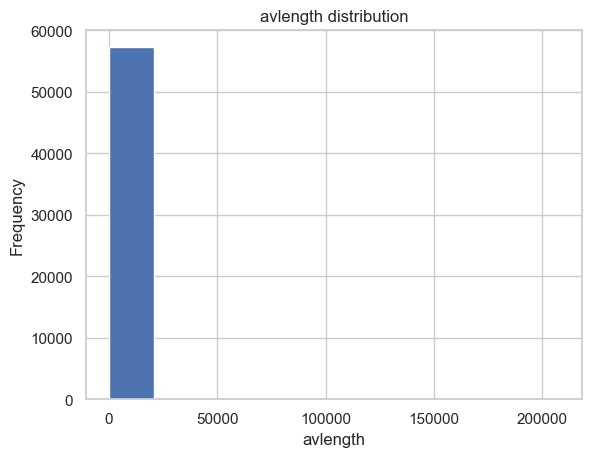

Value count for the avlength:

7.447368      1447
11.714286      340
240.616879     338
14.227368      283
206.887923     159
              ... 
14.708924        1
21.977233        1
5.715961         1
12.929775        1
14.714286        1
Name: avlength, Length: 44462, dtype: int64
number of samples equal/above 1000: 71


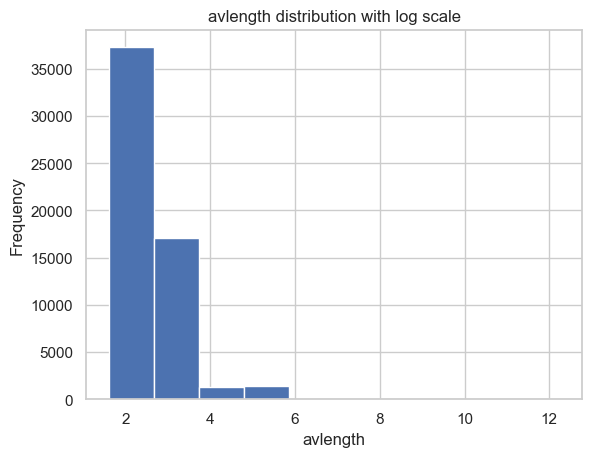

In [18]:
train_data_copy['avlength'].plot.hist()
plt.title('avlength distribution')
plt.xlabel("avlength")
plt.show()

print("Value count for the avlength:\n")
print(train_data_copy['avlength'].value_counts())

print("number of samples equal/above 1000:",(train_data_copy['avlength']>=1000).sum()) #we think the samples are outliers


(np.log(train_data_copy['avlength'])).plot.hist()
plt.title('avlength distribution with log scale')
plt.xlabel("avlength")
plt.show()

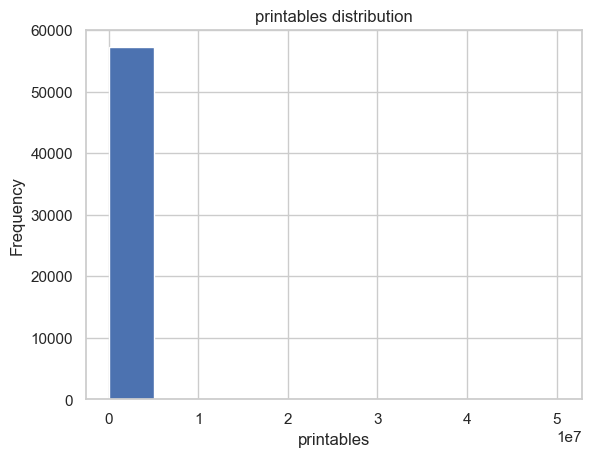

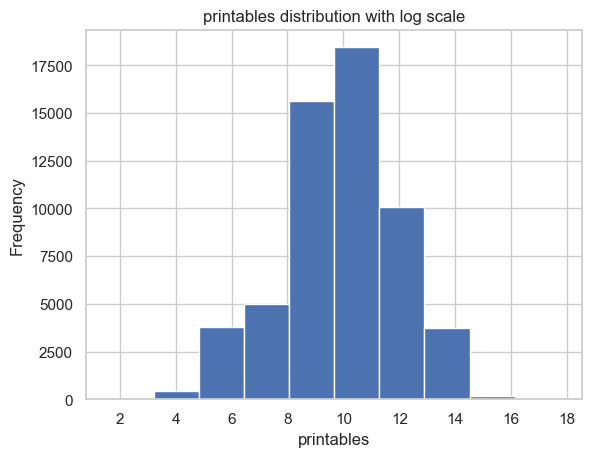

In [19]:
train_data_copy['printables'].plot.hist()
plt.title('printables distribution')
plt.xlabel("printables")
plt.show()

(np.log(train_data_copy['printables'])).plot.hist()
plt.title('printables distribution with log scale')
plt.xlabel("printables")
plt.show()

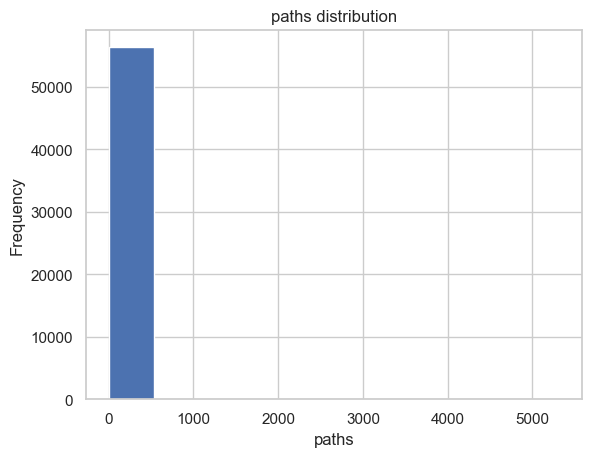

Value count for the paths:

0.0       40792
1.0        7653
2.0        4130
3.0        1089
4.0         705
          ...  
266.0         1
185.0         1
164.0         1
815.0         1
4146.0        1
Name: paths, Length: 168, dtype: int64
number of samples equal/above 200: 48


In [20]:
train_data_copy['paths'].plot.hist()
plt.title('paths distribution')
plt.xlabel("paths")
plt.show()
print("Value count for the paths:\n")
print(train_data_copy['paths'].value_counts())

print("number of samples equal/above 200:",(train_data_copy['paths']>=200).sum()) #we think the samples are outliers



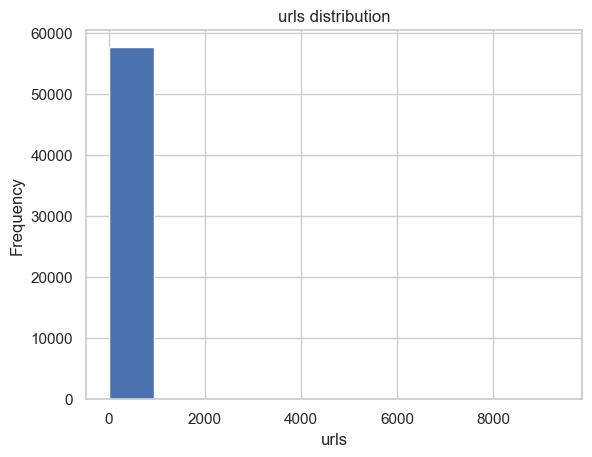

number of samples equal/above 1000: 29


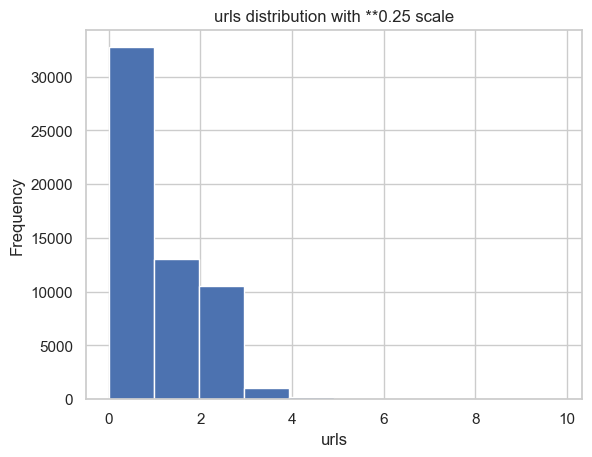

In [21]:
train_data_copy['urls'].plot.hist()
plt.title('urls distribution')
plt.xlabel("urls")
plt.show()

print("number of samples equal/above 1000:",(train_data_copy['urls']>=1000).sum()) #we think the samples are outliers

np.sqrt(np.sqrt(train_data_copy['urls'])).plot.hist()
plt.title('urls distribution with **0.25 scale')
plt.xlabel("urls")
plt.show()

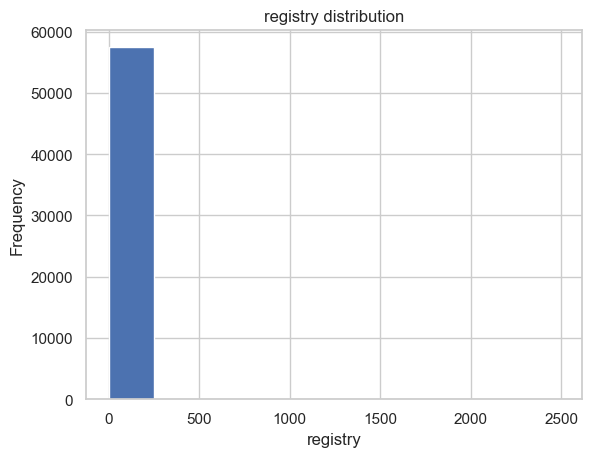

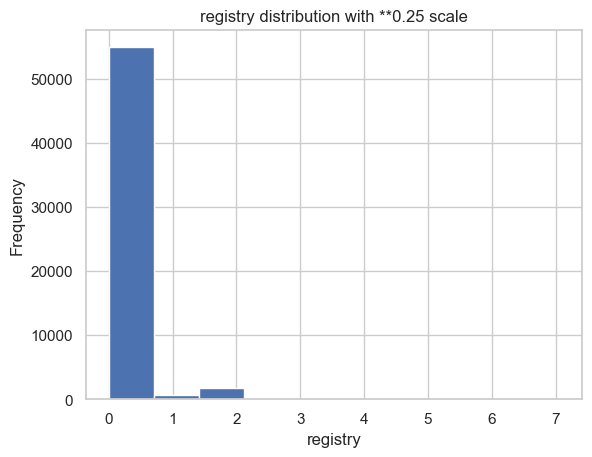

Value count for the registry:

0.0       54948
14.0        483
7.0         445
1.0         326
4.0         255
5.0         254
2.0         207
3.0         108
6.0          63
8.0          52
9.0          52
12.0         47
10.0         46
16.0         19
13.0         18
11.0         17
15.0         14
21.0         13
20.0         12
27.0         10
25.0          6
18.0          6
63.0          5
59.0          5
17.0          5
32.0          5
35.0          4
28.0          4
38.0          4
19.0          4
23.0          3
22.0          3
79.0          2
49.0          2
43.0          2
34.0          2
33.0          2
36.0          2
30.0          2
122.0         1
2492.0        1
51.0          1
40.0          1
29.0          1
132.0         1
73.0          1
126.0         1
850.0         1
309.0         1
460.0         1
42.0          1
117.0         1
31.0          1
81.0          1
41.0          1
60.0          1
46.0          1
Name: registry, dtype: int64


In [22]:
train_data_copy['registry'].plot.hist()
plt.title('registry distribution')
plt.xlabel("registry")
plt.show()


np.sqrt(np.sqrt(train_data_copy['registry'])).plot.hist()
plt.title('registry distribution with **0.25 scale')
plt.xlabel("registry")
plt.show()


print("Value count for the registry:\n")
print(train_data_copy['registry'].value_counts())

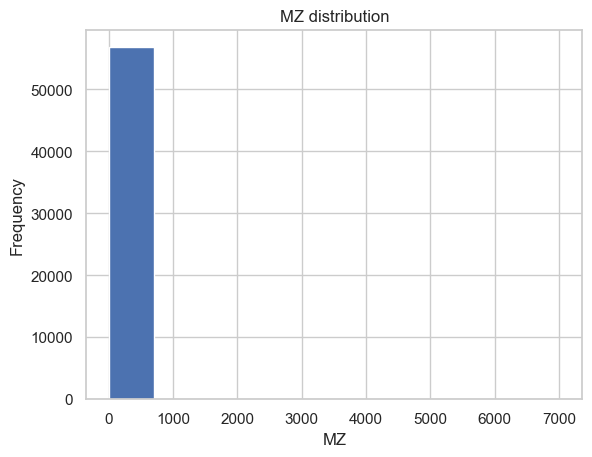

number of samples equal/above 1000: 47


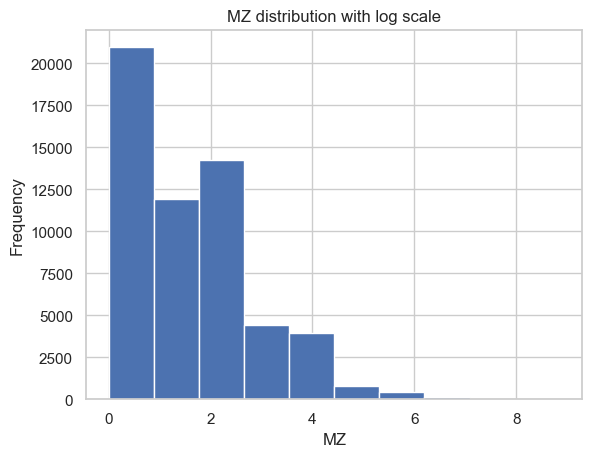

In [23]:
train_data_copy['MZ'].plot.hist()
plt.title('MZ distribution')
plt.xlabel("MZ")
plt.show()
print("number of samples equal/above 1000:",(train_data_copy['MZ']>=1000).sum()) #we think the samples are outliers

(np.log(train_data_copy['MZ'])).plot.hist()
plt.title('MZ distribution with log scale')
plt.xlabel("MZ")
plt.show()

Value count for the file_type_trid:

Win64 Executable (generic)                   10085
Win32 Executable MS Visual C++ (generic)      8967
Win32 Executable (generic)                    8781
Win32 Dynamic Link Library (generic)          4010
Generic CIL Executable (.NET, Mono, etc.)     3804
                                             ...  
MS Flight Simulator Gauge                        1
Photoshop filter plug-in                         1
VirtualDub Filter Plug-in                        1
GIMP Plugin (Win)                                1
WinArchiver Mountable compressed Archive         1
Name: file_type_trid, Length: 89, dtype: int64

number of unique samples:  12

number of categories:  (89,)


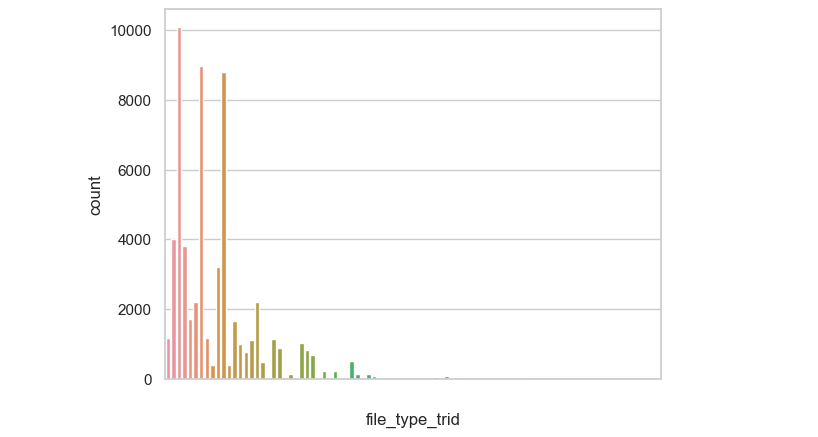

In [24]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["file_type_trid"])
plt.xticks(color='w')
print("Value count for the file_type_trid:\n")
print(train_data_copy['file_type_trid'].value_counts())

print("\nnumber of unique samples: ",(train_data_copy['file_type_trid'].value_counts()==1).sum())
print("\nnumber of categories: ",(train_data_copy['file_type_trid'].value_counts()).shape)


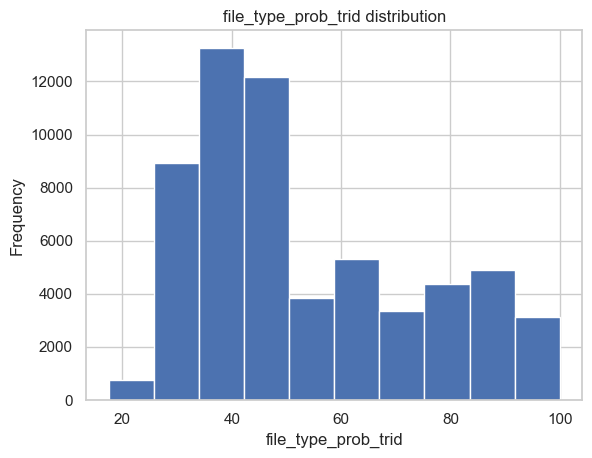

In [25]:
train_data_copy['file_type_prob_trid'].plot.hist()
plt.title('file_type_prob_trid distribution')
plt.xlabel("file_type_prob_trid")
plt.show()

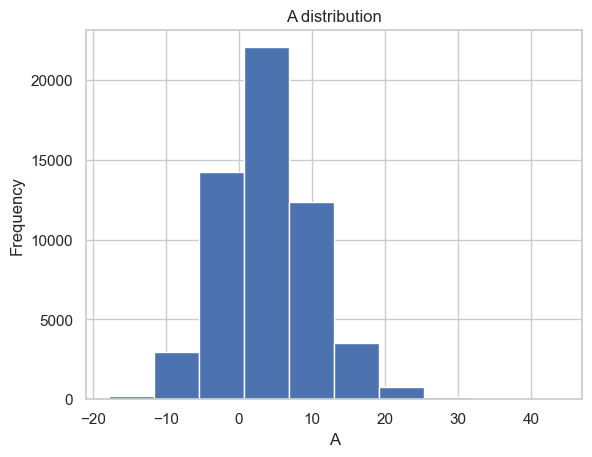

In [26]:
train_data_copy['A'].plot.hist()
plt.title('A distribution')
plt.xlabel("A")
plt.show()

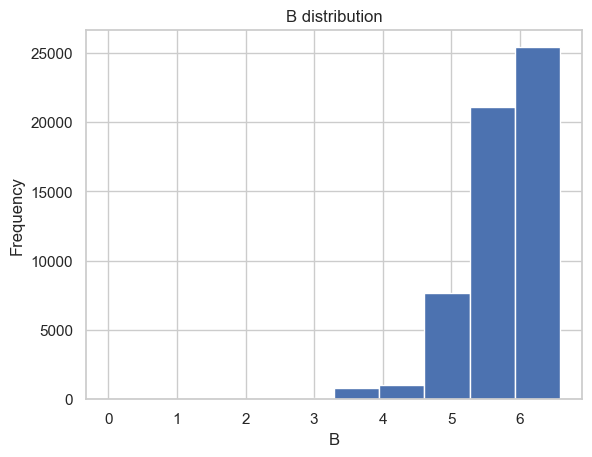

number of samples less than 2: 77


In [27]:
train_data_copy['B'].plot.hist()
plt.title('B distribution')
plt.xlabel("B")
plt.show()
print("number of samples less than 2:",(train_data_copy['B']<2).sum()) #we think the samples are outliers


number of samples = vr: 602


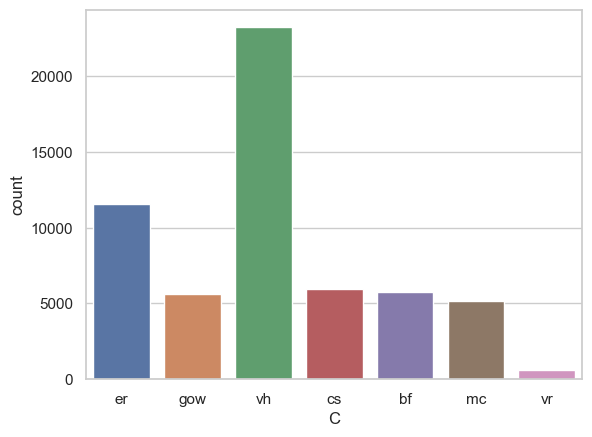

In [28]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train_data_copy["C"])
print("number of samples = vr:",(train_data_copy['C']=='vr').sum()) #maybe outliers


#### features correlations

In [29]:
train_data_copy.corr()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,...,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,label
size,1.000000,0.109044,0.187422,0.057827,-0.031231,0.007360,0.078122,0.066558,0.171758,0.066580,...,0.087248,0.181537,0.013188,0.715902,0.412911,0.080910,-0.005623,-0.004659,0.141985,-0.043614
vsize,0.109044,1.000000,0.033867,0.013645,-0.016381,-0.010677,-0.000076,-0.005035,0.044195,0.024533,...,0.028955,0.012974,0.002712,0.056119,0.045633,-0.000374,-0.018682,0.001189,0.039870,0.004868
imports,0.187422,0.033867,1.000000,0.158163,0.113871,0.135037,0.092599,0.157878,0.214137,0.036311,...,0.092239,0.079109,0.017781,0.032971,0.111582,-0.004396,0.058335,0.003751,0.044927,-0.031191
exports,0.057827,0.013645,0.158163,1.000000,0.031185,0.051015,0.008133,0.044808,0.016848,0.022839,...,0.017226,0.029075,0.004846,-0.001670,0.087669,-0.000321,-0.007479,0.006241,-0.021002,-0.045285
has_debug,-0.031231,-0.016381,0.113871,0.031185,1.000000,0.337964,0.151273,0.342834,-0.022961,-0.022749,...,0.007187,0.085219,-0.009699,-0.039839,-0.048686,0.003503,0.084040,-0.003281,-0.153974,-0.326436
has_relocations,0.007360,-0.010677,0.135037,0.051015,0.337964,1.000000,0.120195,0.256565,0.211250,-0.011012,...,0.016152,0.072409,-0.003214,-0.027822,0.083208,0.013720,0.007956,-0.004549,-0.124774,-0.151787
has_resources,0.078122,-0.000076,0.092599,0.008133,0.151273,0.120195,1.000000,0.202268,0.084716,-0.036160,...,0.010172,0.054176,-0.014738,0.055207,0.055385,0.005291,-0.016036,-0.008758,0.002305,-0.119871
has_signature,0.066558,-0.005035,0.157878,0.044808,0.342834,0.256565,0.202268,1.000000,0.153562,0.001555,...,0.010932,0.179487,0.007806,0.041191,-0.007196,-0.008280,0.079371,-0.006997,0.019596,-0.282491
has_tls,0.171758,0.044195,0.214137,0.016848,-0.022961,0.211250,0.084716,0.153562,1.000000,0.039541,...,0.022702,0.048950,0.005398,0.071444,0.166440,-0.000862,0.054515,0.000515,0.105696,0.137018
symbols,0.066580,0.024533,0.036311,0.022839,-0.022749,-0.011012,-0.036160,0.001555,0.039541,1.000000,...,0.008853,0.003490,0.008686,0.001859,0.196231,0.000066,0.000658,-0.005377,-0.022239,-0.027333


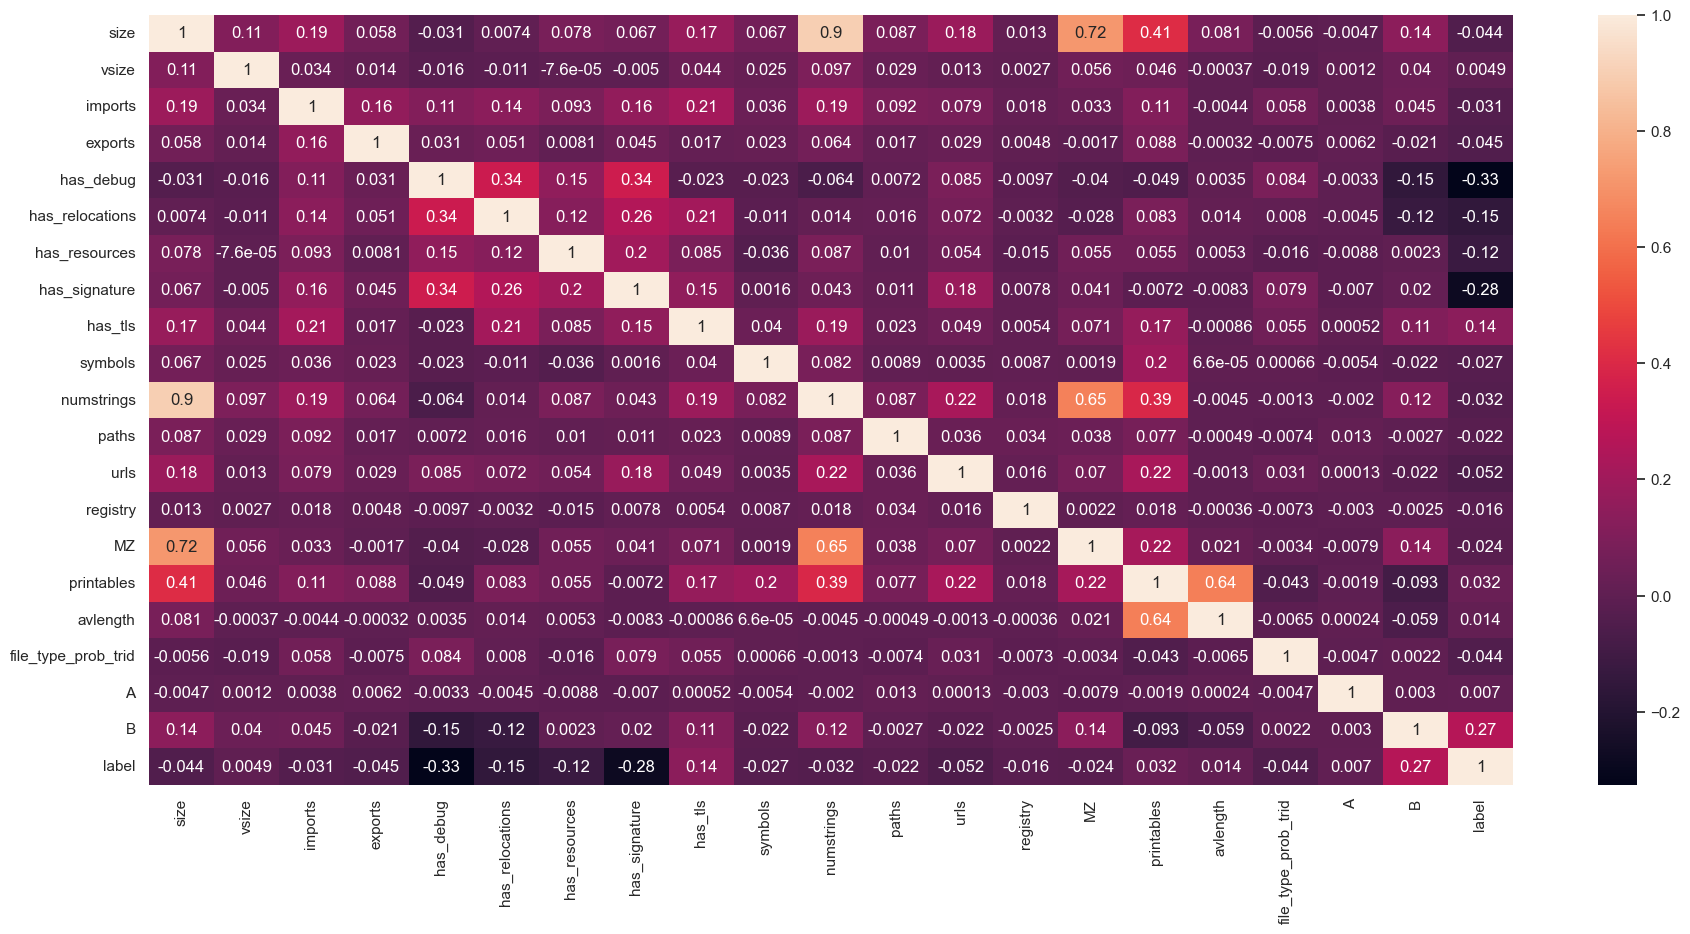

In [30]:
plt.figure(figsize=(22, 10))

sns.heatmap(train_data_copy.corr(),
            annot=True,
            xticklabels = train_data_copy.corr().columns,
            yticklabels = train_data_copy.corr().columns)
plt.show()

We see that the correlation between numstrings and size is very high (0.9). <br>
We think that if we'll delete one of them it will make the model's prediction better because then the model will learn less noise. <br>
To do so, we will perform some exploration on both and try to decide which one we will prefer do delete. <br>
First, we will check how many missing values there are in each:

In [31]:
print("Number of missing values in size feature: ",train_data_copy['size'].isnull().sum())
print("Number of missing values in numstrings feature: ",train_data_copy['numstrings'].isnull().sum())

Number of missing values in size feature:  0
Number of missing values in numstrings feature:  2718


From above results it is obvious we will delete numstrings because "size" has zero missing values and "numstrings" has 2718 missing values.

# Part 2

## Pre-processing

In [32]:
def preprocessing(train_data,test_data):

    #### train preprocessing ####

    train_data_reduced = train_data.copy()

    # outliers
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["imports"] >= 2000].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["paths"] >= 200].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["MZ"] >= 1000].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["exports"] >= 5000].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["urls"] >= 1000].index)

    
    # IQR
    log_transform_cols = ['size', 'vsize', 'numstrings', 'printables']
    train_data_reduced_wlog = train_data_reduced.copy()

    for col in log_transform_cols:
        train_data_reduced_wlog[col] = np.log(train_data_reduced_wlog[col])

    log_transform_cols.append('A')

    outliers_removed = False

    for col in log_transform_cols:
        if not outliers_removed:
            Q1 = train_data_reduced_wlog[col].quantile(0.25)
            Q3 = train_data_reduced_wlog[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            upper_array = np.where(train_data_reduced_wlog[col] >= upper)[0]
            lower_array = np.where(train_data_reduced_wlog[col] <= lower)[0]
            
            train_data_reduced_wlog = train_data_reduced_wlog.loc[~train_data_reduced_wlog.index.isin(upper_array)]
            train_data_reduced_wlog = train_data_reduced_wlog.loc[~train_data_reduced_wlog.index.isin(lower_array)]
            
            outliers_removed = True

    #features removal
    #train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["registry"]) #we tried to remove it and saw that it's better not to remove
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["symbols"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["sha256"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["numstrings"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["file_type_trid"])
    train_data_reduced_wlog = train_data_reduced_wlog.reset_index(drop=True)


    # Separate numerical and categorical features
    numerical_cols = [ 'size', 'vsize', 'imports', 'exports', 'paths', 'urls', 'MZ', 'printables', 'avlength', 'file_type_prob_trid', 'A', 'B','registry']
    categorical_cols = ['has_debug', 'has_relocations', 'has_resources', 'has_signature' ,'has_tls', 'C']

    train_data_fill_na = train_data_reduced_wlog.copy()

    #Fill NA numeric
    for i in numerical_cols:
        i_mean = train_data_reduced_wlog[i].mean()
        train_data_fill_na[i].fillna(i_mean, inplace=True) 

    #Fill NA categorical
    for j in categorical_cols:
        most_frequent_value =train_data_reduced_wlog[j].value_counts().idxmax()
        train_data_fill_na[j].fillna(most_frequent_value, inplace=True)
    
    # Normalize numerical data
    scaler = MinMaxScaler()
    train_data_norm = train_data_fill_na.copy()
    train_data_norm[numerical_cols] = pd.DataFrame(scaler.fit_transform(train_data_fill_na[numerical_cols]))

    # dealing with categorical data
    encoder = OneHotEncoder(handle_unknown='ignore')
    train_data_copy_encoded = (encoder.fit_transform(train_data_fill_na[categorical_cols]))
    train_data_copy_encoded_df = pd.DataFrame(train_data_copy_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    train_data_norm = pd.concat([train_data_norm.drop(categorical_cols, axis=1).reset_index(drop=True), train_data_copy_encoded_df], axis=1)

    preprocessed_train = train_data_norm
    


    #### test/validation preprocessing ####

    x_test_removed = test_data.copy()

    #x_test_removed = x_test_removed.drop(columns=["registry"]) #we tried to remove it and saw that it's better not to remove
    x_test_removed = x_test_removed.drop(columns=["symbols"])
    x_test_removed = x_test_removed.drop(columns=["sha256"])
    x_test_removed = x_test_removed.drop(columns=["numstrings"]) 
    x_test_removed = x_test_removed.drop(columns=["file_type_trid"])
    x_test_removed = x_test_removed.reset_index(drop=True)

    x_test_fill_na = x_test_removed.copy()

    #Fill NA numeric
    for i in numerical_cols:
        i_mean = train_data_reduced_wlog[i].mean()
        x_test_fill_na[i].fillna(i_mean, inplace=True) 

    #Fill NA categorical
    for j in categorical_cols:
        most_frequent_value =train_data_reduced_wlog[j].value_counts().idxmax()
        x_test_fill_na[j].fillna(most_frequent_value, inplace=True)

    # Normalize numerical data
    test_norm = x_test_fill_na.copy()
    test_norm[numerical_cols] = pd.DataFrame(scaler.transform(x_test_fill_na[numerical_cols]))

    # dealing with categorical data
    test_encoded = (encoder.transform(x_test_fill_na[categorical_cols]))
    test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    test_norm_all = pd.concat([test_norm.drop(categorical_cols, axis=1).reset_index(drop=True), test_encoded_df], axis=1)

    preprocessed_test = test_norm_all
    
    return preprocessed_train, preprocessed_test

### Train and Test pre-processing

In [33]:
train_preprocessed, test_preprocessed = preprocessing(train_data_copy,test_data_copy)
# splitting features and labels
labels = train_preprocessed['label']
data = train_preprocessed.drop('label',axis=1)

lets see how the splitted train data looks:

In [34]:
data

,size,vsize,imports,exports,paths,urls,registry,MZ,printables,avlength,...,has_signature_1.0,has_tls_0.0,has_tls_1.0,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
0,0.771913,0.594122,0.262262,0.000600,0.000000,0.000000,0.0,0.027300,0.750368,0.000043,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.331213,0.278168,0.001001,0.000000,0.000000,0.000000,0.0,0.000000,0.318935,0.000022,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.595981,0.451340,0.066567,0.000801,0.000000,0.032226,0.0,0.001011,0.544976,0.000034,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.255107,0.265529,0.003003,0.000000,0.000000,0.000000,0.0,0.000000,0.304478,0.000022,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.553722,0.419045,0.066567,0.000000,0.000000,0.000000,0.0,0.004044,0.550606,0.000012,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59530,0.621916,0.519298,0.001001,0.000000,0.000000,0.000000,0.0,0.013145,0.522762,0.000003,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59531,0.669841,0.510782,0.094595,0.000000,0.000000,0.011434,0.0,0.011122,0.543087,0.000013,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59532,0.268731,0.272165,0.000501,0.000000,0.000000,0.000000,0.0,0.000000,0.293281,0.000012,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59533,0.455235,0.332344,0.000501,0.000000,0.010417,0.020141,0.0,0.000000,0.441528,0.000047,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
labels

0        1
1        0
2        0
3        1
4        1
        ..
59530    1
59531    1
59532    1
59533    0
59534    1
Name: label, Length: 59535, dtype: int64

## Answering the questions

### Outliers

Looking at the visualization of the data, for each feature we looked at the samples that their values are rare, these are samples that most likely do not represent the distribution of the data and we don't want our models to learn from them.
percentage of label 1 in the suspected outliers in:
imports:  1.6666666666666667, paths:  14.583333333333334, MZ:  12.76595744680851, exports:  1.8867924528301887, avlength:  98.59154929577466, urls:  13.793103448275861, B:  84.4155844155844
We can see that we should not delete these outliers in avlength and B, because most of their labels are 1 what can imply a connection between the rare values in those features and the labels. 

In addition, we saw in the exploration that some of the features are normally distributed when we applied log scale on them or as is.
We used IQR to find the outliers in those features (assumed normal distribution). 
These outliers can be removed from the dataset to obtain a more accurate representation of the data. However, we know that when removing outliers, it can be problematic because they may contain valuable information. We chose to remove them because they represent a small percentage of the samples from the dataset. Hence there is a lower chance that they all are valuable.

**The IQR (Interquartile Range) method** is used to identify outliers from a dataset. It involves calculating the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1). The lower and upper bounds are determined by multiplying the IQR by 1.5.<br>
Data points outside these bounds are considered outliers. These outliers can be removed from the dataset to obtain a more accurate representation of the data.<br>
However, we know that when removing outliers, it can be problematic because they may contain valuable information. <br>
We chose to remove them because they represent a small percentage of the samples from the dataset. Hence there is a lower chance that they all are valuable.

exploring the labels in the suspected outliers before removing:

In [36]:
train_data_reduced = train_data_copy.copy()

def check_labels(data, col_name,sign, threshold):
    if (sign == '>='):
        num_samples = (data[col_name] >= threshold).sum() 
        num_1_label = (data['label'])[data[col_name] >= threshold].sum()
        

    if (sign == '<'):
        num_samples = (data[col_name] < threshold).sum() 
        num_1_label = (data['label'])[data[col_name] < threshold].sum()

    percentage_1  = num_1_label/num_samples*100    
    print("percentage of label 1 in the suspected outliers in", col_name, "is:", percentage_1)

check_labels(train_data_reduced,"imports",'>=', 2000)  
check_labels(train_data_reduced,"paths",'>=', 200)    
check_labels(train_data_reduced,"MZ",'>=', 1000)    
check_labels(train_data_reduced,"exports",'>=', 5000)    
check_labels(train_data_reduced,"avlength",'>=', 1000)    
check_labels(train_data_reduced,"urls",'>=', 1000)    
check_labels(train_data_reduced,"B",'<', 2)    

percentage of label 1 in the suspected outliers in imports is: 1.6666666666666667
percentage of label 1 in the suspected outliers in paths is: 14.583333333333334
percentage of label 1 in the suspected outliers in MZ is: 12.76595744680851
percentage of label 1 in the suspected outliers in exports is: 1.8867924528301887
percentage of label 1 in the suspected outliers in avlength is: 98.59154929577466
percentage of label 1 in the suspected outliers in urls is: 13.793103448275861
percentage of label 1 in the suspected outliers in B is: 84.4155844155844


percentage of label 1 in the suspected outliers in  avlength  is:  98.59154929577466 <br>
percentage of label 1 in the suspected outliers in  B  is:  84.4155844155844 <br>

We can see that we should not delete these outliers in avlength and B, because most of their labels are 1 what can imply a connection between the rare values in those features and the labels

### Missing values

We used the isnull function to detect and count missing values for each sample and for each feature.<br>
We chose to fill the missing values in the numerical features with the column's mean because this way helps to maintain the overall integrity and statistical properties of the data.
In the categorical features, we chose to fill the missing values with the most frequent value because it helps to maintain the majority class distribution and preserves the integrity of the categorical data.


In [37]:
#Find out about missing values in all features
data.isnull().sum(axis = 0)

size                   0
vsize                  0
imports                0
exports                0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_prob_trid    0
A                      0
B                      0
has_debug_0.0          0
has_debug_1.0          0
has_relocations_0.0    0
has_relocations_1.0    0
has_resources_0.0      0
has_resources_1.0      0
has_signature_0.0      0
has_signature_1.0      0
has_tls_0.0            0
has_tls_1.0            0
C_bf                   0
C_cs                   0
C_er                   0
C_gow                  0
C_mc                   0
C_vh                   0
C_vr                   0
dtype: int64

In [38]:
#Find out about missing values in rows
data.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
59530    0
59531    0
59532    0
59533    0
59534    0
Length: 59535, dtype: int64

### Normalization

The data is not normalized because there are values that are not in the range of 0 to 1.
We think that the data should be normalized because normalization is important for several reasons:
1. Normalizing the data brings all the features and samples to a common scale, ensuring that they are comparable and can be analyzed together.
2. Values with larger size can dominate the analysis and overshadow values with smaller size. Normalizing prevents this overshadowing. 
Overall, normalizing the data leads to more accurate insights from the data.
That's why we normalized them by using MinMaxScaler for numerical data. (Explanation about MinMaxScaler in appendix 3).

MinMaxScaler rescales the data by subtracting the minimum value and dividing by the range (maximum value minus minimum value) of each feature. All features will have values between 0 and 1, where 0 represents the minimum value and 1 represents the maximum value in the original dataset.<br> This normalization preserves the relative relationships and distributions among the data points while putting them on a consistent scale.

### Dealing with categorical data

OneHotEncoder is used to convert categorical features into a numerical representation.

It transforms categorical features into binary columns and adds new ones (known as “dummy features”) for each unique category in the original feature.
One of the benefits of this method is that it avoids any ordinality assumptions and it helps prevent the algorithm from assigning unintended numerical relations to different categories.

Because we chose this type of dealing that increases the number of features in the data, we decided to remove the features that add “too much” dimensions (sha256 and file_type_trid).

### Dimensionality

As we mentioned earlier, because we used the OneHotEncoder method, the number of columns increased.
This can be a problem for several reasons:
1. More columns means more dimensions --> more complex model --> the variance increases and the bias decreases (bias variance tradeoff) --> can lead to overfitting.
2. When we increase the number of features in a dataset, we also increase the potential for noise that weakens the meaningful signal in the data.
3. Curse of dimensionality - increasing the number of features means that the data might become sparser, and data points become more distant. This makes it harder to recognize patterns or relations.

There are several ways for recognizing when the dimensionality is too big:
1. Using dimensionality reduction techniques. In PCA for example, we can see the amount of variance in the data explained by each principal component. If a few principal components capture most of the variance, it suggests that the remaining dimensions might not contribute significantly and could potentially be dropped.
2. Techniques like feature importance or feature selection can help identify the most relevant features. If many features have low importance to the model's performance, it suggests that the dimensionality may be too high.
It is important to say that there is no specific threshold that tells when dimensionality is getting too big.


#### Dimensionality reduction

##### Manual feature selection

We noticed several features that we excluded earlier with the outliers exclusion:
1. There were features that most of their values were zeros (symbols,registry) meaning there's a low chance they help to predict the labels.
2. We know that the sha256 feature represents a unique value for each sample meaning there's a very low chance it helps to predict the labels.
3. We saw that there is high correlation between size and numstrings. We saw that size doesn't have missing values at all and numstrings does. So we decided to remove numstrings.
4. In file_type_trid there are a lot of categories (as you can see in the exploration part). Turning each category into a Dummy feature is problematic because of the Curse of Dimensionality. so we decided to remove it.

##### PCA

We performed PCA method on the data preprocessed data (in the kfold cross validation in part 4) to check if the dimensionality is too big. We wanted the reduced data to keep 99% of the variance. After checking the AUC score with and without the PCA reduction, we decided to not use this method because it lowers the score (ROC curve and AUC score in appendix 6).

#### Mathematical transformation on features

As we mentioned earlier, we applied log scale on some features when we used IQR method to detect outliers. We applied log scale to the features permanently in the train and test/validation data (removed the outliers only on the train data).


#### lets look at our preprocessed data:

In [39]:
train_preprocessed

,size,vsize,imports,exports,paths,urls,registry,MZ,printables,avlength,...,has_signature_1.0,has_tls_0.0,has_tls_1.0,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
0,0.771913,0.594122,0.262262,0.000600,0.000000,0.000000,0.0,0.027300,0.750368,0.000043,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.331213,0.278168,0.001001,0.000000,0.000000,0.000000,0.0,0.000000,0.318935,0.000022,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.595981,0.451340,0.066567,0.000801,0.000000,0.032226,0.0,0.001011,0.544976,0.000034,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.255107,0.265529,0.003003,0.000000,0.000000,0.000000,0.0,0.000000,0.304478,0.000022,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.553722,0.419045,0.066567,0.000000,0.000000,0.000000,0.0,0.004044,0.550606,0.000012,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59530,0.621916,0.519298,0.001001,0.000000,0.000000,0.000000,0.0,0.013145,0.522762,0.000003,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59531,0.669841,0.510782,0.094595,0.000000,0.000000,0.011434,0.0,0.011122,0.543087,0.000013,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59532,0.268731,0.272165,0.000501,0.000000,0.000000,0.000000,0.0,0.000000,0.293281,0.000012,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59533,0.455235,0.332344,0.000501,0.000000,0.010417,0.020141,0.0,0.000000,0.441528,0.000047,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
test_preprocessed

,size,vsize,imports,exports,paths,urls,registry,MZ,printables,avlength,...,has_signature_1.0,has_tls_0.0,has_tls_1.0,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
0,74273.668556,130531.976394,0.001001,0.003776,0.000000,0.000000,0.0,0.013145,1422.162948,0.000003,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8986.228458,12640.090011,0.068068,0.000000,0.005208,0.000000,0.0,0.004044,461.605354,0.000074,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,237988.577071,7480.707675,0.062062,0.000200,0.062500,0.000000,0.0,0.008089,9215.894956,0.000029,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,96212.080004,79196.122149,0.000000,0.000000,0.000000,0.011434,0.0,0.001011,7513.446311,0.000066,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,163020.854685,134917.451380,0.082583,0.000000,0.020833,0.000000,0.0,0.001011,1337.077725,0.000012,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,109770.910972,91320.670639,0.037037,0.000000,0.000000,0.000000,0.0,0.031345,3179.123191,0.000013,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17996,9143.889284,7996.645909,0.005506,0.000000,0.015625,0.010070,0.0,0.000000,719.031564,0.000077,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17997,19208.315868,15477.750296,0.000501,0.000000,0.010417,0.021148,0.0,0.000000,5451.121900,0.000112,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17998,1457.924055,2579.294456,0.000501,0.000000,0.005208,0.000000,0.0,0.000000,310.535672,0.000063,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Lets look at the correlation matrix after all the preprocessing and see if we can remove more features:

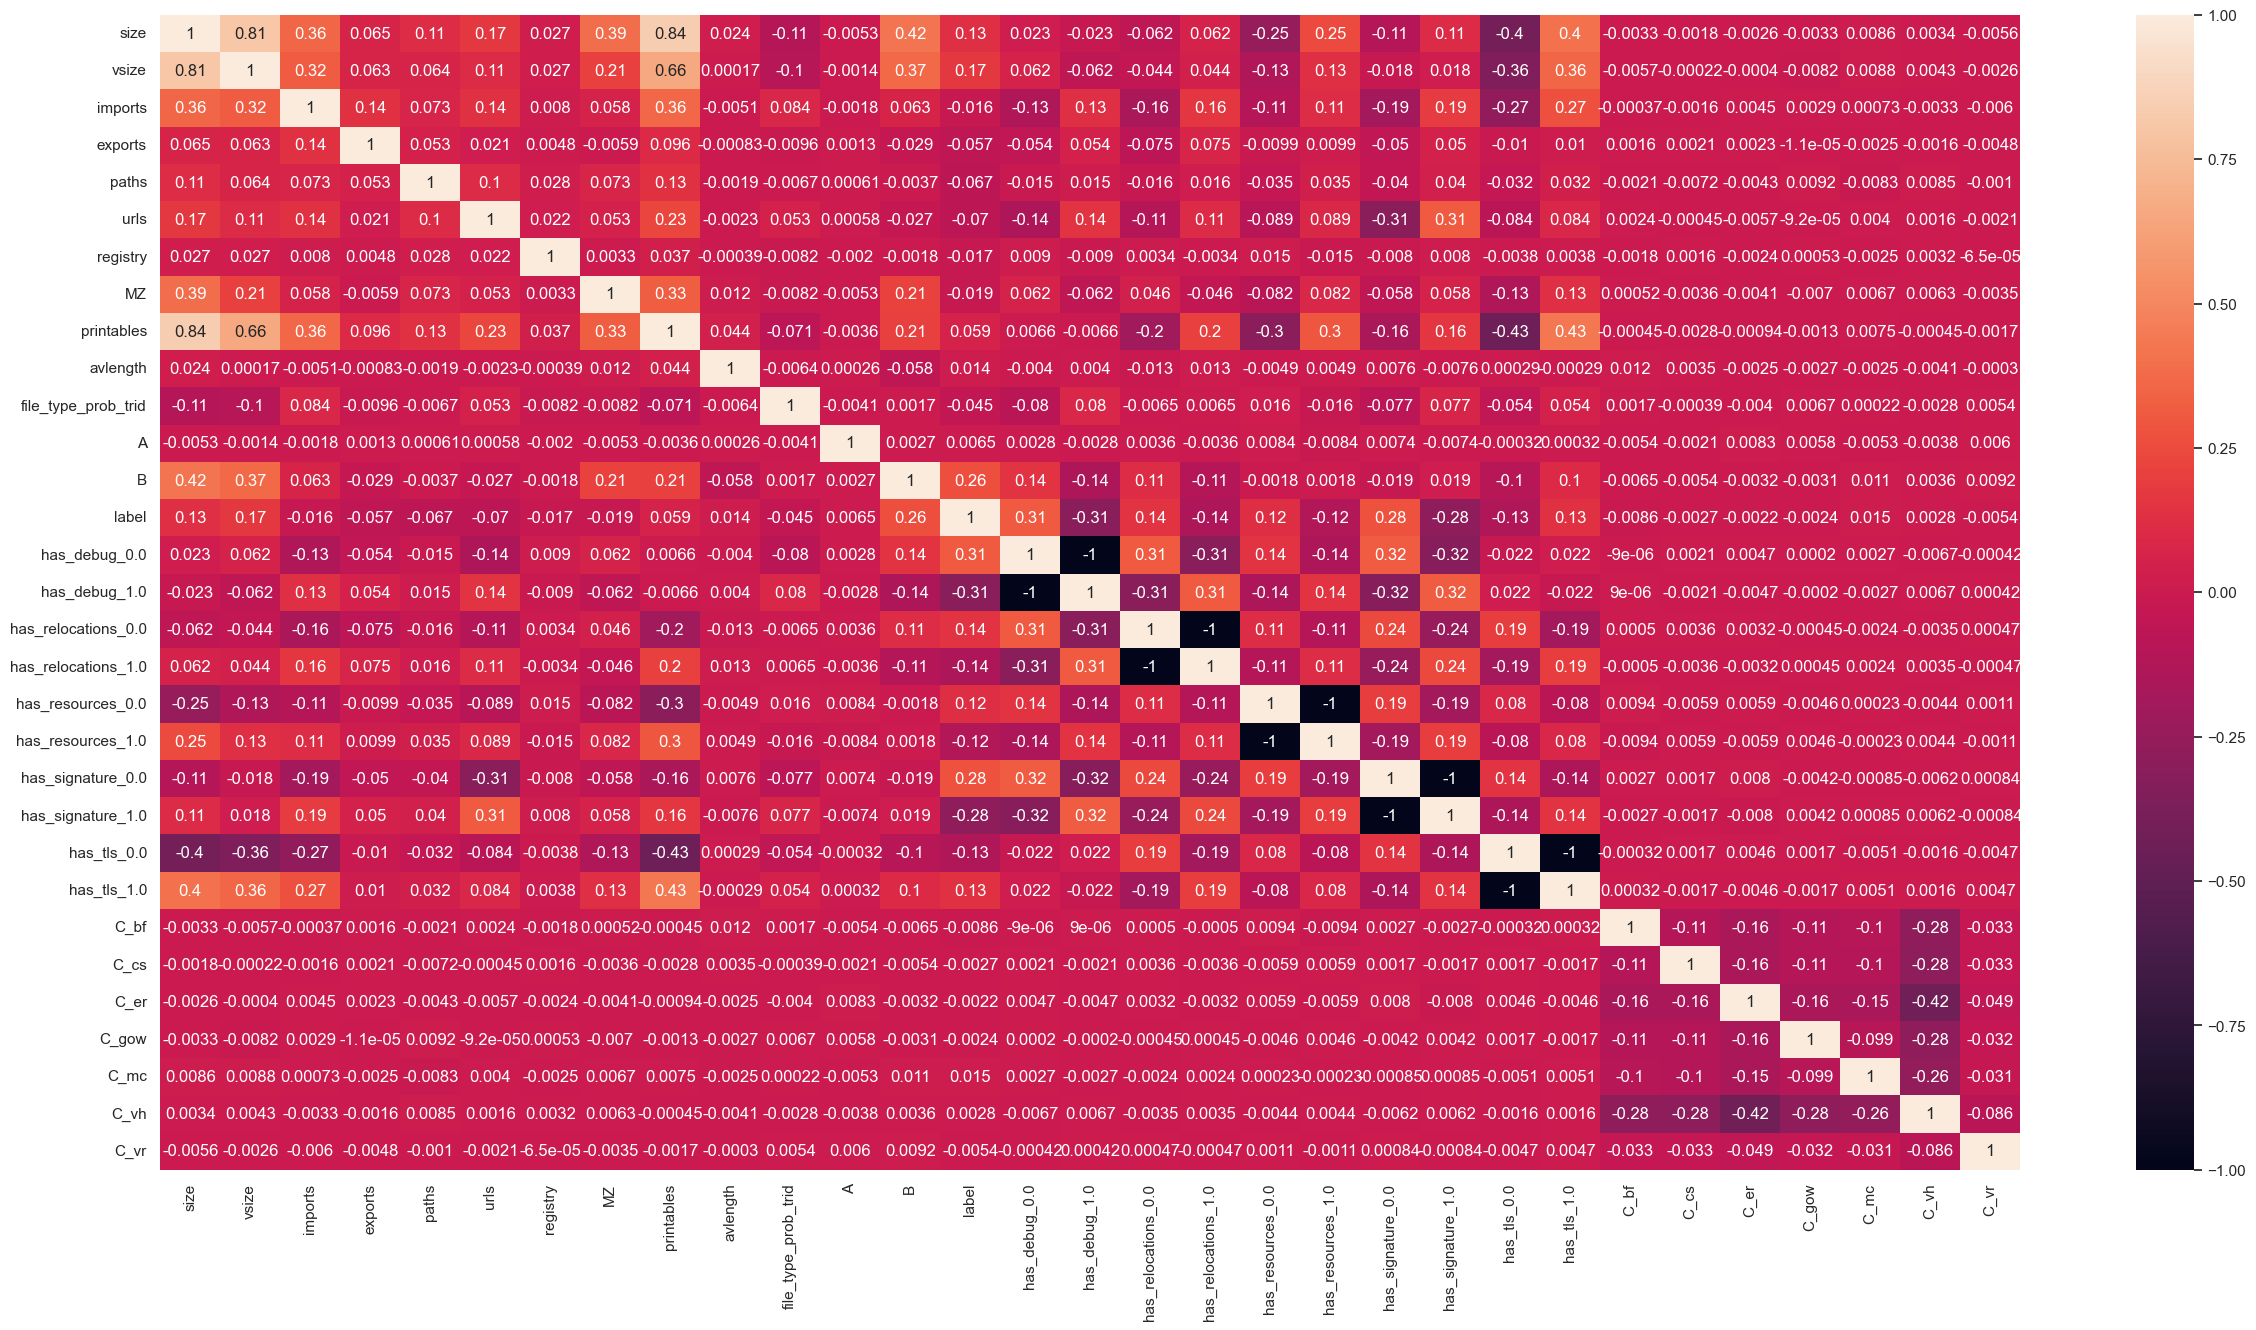

In [41]:
plt.figure(figsize=(30, 15))

sns.heatmap(train_preprocessed.corr(),
            annot=True,
            xticklabels = train_preprocessed.corr().columns,
            yticklabels = train_preprocessed.corr().columns)
plt.show()

After all the preprocessing, we checked the correlation between the “new” features. We noticed that the correlation between size and vsize is 0.81 (high) and the correlation between size and printables is 0.84 (high). The correlation between vsize and printables is 0.66(not that high). We think that the correlation between size and vsize is not surprising because of the meaning of them. After checking the AUC score with and without vsize we decided to remove vsize to improve the score.
After checking the AUC score with and without printables we decided not to remove it because removing it decreases the score. It doesn’t surprise us because the connection between them is not clear to us so we can’t assume what exactly made this change in correlations, unlike size and vsize.


## 2nd Pre-processing

In [42]:
def preprocessing2(train_preprocessed, test_preprocessed):
    train_preprocessed = train_preprocessed.drop(columns=["vsize"])
    test_preprocessed = test_preprocessed.drop(columns=["vsize"])
    return train_preprocessed, test_preprocessed

train_preprocessed_2, test_preprocessed_2 = preprocessing2(train_preprocessed, test_preprocessed)
# splitting features and labels
labels2 = train_preprocessed_2['label']
data2 = train_preprocessed_2.drop('label',axis=1)

PCA

In [43]:
pca = PCA(0.99)
pca.fit(data2)
X_reduced_pca = pca.transform(data2)
print("original shape:   ", data2.shape)
print("transformed shape:", X_reduced_pca.shape)


original shape:    (59535, 29)
transformed shape: (59535, 14)


In [44]:
train_preprocessed_2.shape

(59535, 30)

In [45]:
test_preprocessed_2.shape

(18000, 29)

## Modeling

In [46]:
def knn(x_train, y_train): #without fitting, just returning the model with best params
    #for grid search run this:
    """knn_model = KNeighborsClassifier()  
    param_knn = dict(n_neighbors= [200,500,1000,2000], weights=['uniform'], algorithm=['auto'], leaf_size=[30], p=[2], 
                     metric=['minkowski'], metric_params=[None], n_jobs=[None]) 
    grid_knn = GridSearchCV(knn_model, param_knn, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1).fit(x_train, y_train)
    best_params_knn = grid_knn.best_params_
    knn_model_best = KNeighborsClassifier(**best_params_knn)"""
    #and put this in comment:
    knn_model_best = KNeighborsClassifier(n_neighbors= 500, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                     metric='minkowski', metric_params=None, n_jobs=None)
    best_params_knn = None

    return knn_model_best, best_params_knn


def logistic_regression(x_train, y_train): #without fitting, just returning the model with best params
    #for grid search run this:
    """log_reg_model = LogisticRegression()
    param_log_reg = dict(C=[num for num in range(1,100)], penalty=['l1', 'l2'], dual=[False], tol=[0.0001], fit_intercept=[True],
                            intercept_scaling=[1], class_weight=[None], random_state=[None], solver=['lbfgs'], max_iter=[100], multi_class=['auto'], 
                            verbose=[0], warm_start=[False], l1_ratio=[None])
    grid_log_reg = GridSearchCV(log_reg_model, param_log_reg, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1).fit(x_train, y_train)
    best_params_log_reg = grid_log_reg.best_params_
    log_reg_model_best = LogisticRegression(**best_params_log_reg)"""
    #and put this in comment:

    log_reg_model_best = LogisticRegression(C=55, penalty='l2', dual=False, tol=0.0001, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
                            verbose=0, warm_start=False, l1_ratio=None)
    best_params_log_reg = None


    return log_reg_model_best, best_params_log_reg


def adaboost(x_train, y_train): #without fitting, just returning the model with best params

    #for grid search run this:
    """adaboost_model = AdaBoostClassifier()
    param_ada = dict(n_estimators=[1000,1100,1200], learning_rate= [ 1.0,1.5,2.0], estimator=[None], 
                     algorithm=['SAMME.R'], random_state=[None], base_estimator=['deprecated'])
    grid_ada = GridSearchCV(adaboost_model, param_ada, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1).fit(x_train, y_train)
    best_params_ada = grid_ada.best_params_
    ada_model_best = AdaBoostClassifier(**best_params_ada)"""
    #and put this in comment:

    ada_model_best = AdaBoostClassifier(n_estimators=1200, learning_rate= 1.5, estimator=None, 
                     algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
    best_params_ada = None

    return ada_model_best, best_params_ada
    


def mlp(x_train, y_train): #without fitting, just returning the model with best params
    #for grid search run this:
    """mlp_model = MLPClassifier()
    param_mlp = dict(hidden_layer_sizes=[30,40,50,100], max_iter=[200,250], alpha=[10**(p) for p in range(-3,-1)], activation=['relu'], 
                     solver=['adam'], batch_size=['auto'], learning_rate=['constant'], learning_rate_init=[0.001], power_t=[0.5], shuffle=[True], 
                     random_state=[None], tol=[0.0001], verbose=[False], warm_start=[False], momentum=[0.9], nesterovs_momentum=[True], early_stopping=[False], 
                     validation_fraction=[0.1], beta_1=[0.9], beta_2=[0.999], epsilon=[1e-08], n_iter_no_change=[10], max_fun=[15000])
    grid_mlp = GridSearchCV(mlp_model, param_mlp, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1).fit(x_train, y_train)
    best_params_mlp = grid_mlp.best_params_
    mlp_model_best = MLPClassifier(**best_params_mlp)"""
    #and put this in comment:
    
    mlp_model_best = MLPClassifier(hidden_layer_sizes=100, max_iter=200, alpha=0.001, activation='relu', 
                     solver='adam', batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, shuffle=True, 
                     random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
    best_params_mlp = None

    return mlp_model_best, best_params_mlp

#### Model 1 - KNN


In this model the n_neighbors hyperparameter represents the number of nearest neighbors considered by the KNN algorithm. By increasing the number of neighbors, the model's complexity decreases, potentially reducing variance and increasing bias. By decreasing the number of neighbors, the model's complexity increases, potentially reducing bias and increasing variance making it more likely to overfit. 

In [47]:
knn_model, best_params_knn = knn(data2,labels2)

In [48]:
best_params_knn

#### Model 2 - Logistic regression

In this model the hyperparameters are $C = \frac{1}{\lambda}$ (determines the amount of regularization applied to the model) and penalty (type of regularization: l1 or l2).
Higher values of C (lower values of ${\lambda}$) mean less regularization, so the model fits the training data more closely. This can lead to low bias and high variance, making the model more likely to overfit. <br> Lower values of C (higher values of ${\lambda}$) mean more regularization, so the model is simpler with higher bias and lower variance, which can help prevent overfitting. <br>
L1 regularization (Lasso) tends to produce sparse models by making some coefficients to zero, which can reduce variance but potentially increase the bias. L2 regularization (Ridge) balances between bias and variance by finding the best coefficients.  

In [49]:
log_reg_model, best_params_log_reg = logistic_regression(data2,labels2)

In [50]:
best_params_log_reg

#### Model 3 - AdaBoost (Adaptive Boosting)

In the Adaptive boosting (Ada boost) model the hyperparameters are n_estimators and learning_rate.

n_estimators: This hyperparameter represents the number of weak learners (base estimators) to be used in the AdaBoost ensemble.
By increasing the number of estimators, the model becomes more complex, decreasing the bias. If the model becomes too complex, it may start to memorize noise or outliers in the train dataset and increase the variance. This can lead to overfitting.

learning_rate: The learning rate affects how much each weak learner contributes to the final prediction.
A smaller learning rate decreases the weight of each weak learner, making the model less complex. This can increase bias and decrease variance as the model relies less on individual weak learners and may struggle to capture complex patterns in the data.
A larger learning rate assigns more weight to each weak learner, making the model more sensitive to individual predictions and increase the variance and decrease the bias. This can lead to overfitting.

In [51]:
ada_model, best_params_ada = adaboost(data2,labels2)


In [52]:
best_params_ada

This is our best model so we will try to fit it on PCA reducted data to check if we should use PCA

In [53]:
ada_model_pca, best_params_ada_pca = adaboost(X_reduced_pca,labels2)

In [54]:
best_params_ada_pca

#### Model 4 - MLP

In the Multi layer perceptron (MLP) model the hyperparameters are hidden_layer_sizes, max_iter and alpha.

hidden_layer_sizes: determines the number of neurons in each hidden layer of the MLP. Increasing the number of neurons per layer increases the model's complexity, allowing it to learn more complex patterns in the data. This can lead to lower bias because the model becomes more capable of fitting more relationships in the train data. However, increasing the number of neurons also increases the variance of the predictions what can result the model becoming too specific to the training data increasing the risk of overfitting.

max_iter: determines the maximum number of iterations for training the MLP. It controls the amount of time the model has to learn from the data. Increasing max_iter increases the model’s training time, so it has more opportunities to capture complex relationships in the data what leads to reducing bias and increasing variance. If max_iter is set too high, the model may continue to fit the training data too closely, leading to too high variance and overfitting.

alpha: controls the amount of regularization applied to the weights of the MLP. Regularization helps prevent overfitting by penalizing large weights. Increasing alpha increases the amount of the regularization, which can lead to higher bias due to reducing the weights making it more resistant to noise in the data. However, if alpha is set too high, the model may become too constrained and have difficulty capturing complex patterns, decreasing the variance too much, resulting in underfitting and higher bias. Reducing alpha decreases the amount of the regularization, so the model becomes sensitive to noise and outliers in the data, increasing the variance.

In [55]:
mlp_model, best_params_mlp = mlp(data2,labels2)

In [56]:
best_params_mlp

# Part 4

## Evaluating the models

### K-Fold cross validation & ROC

In [57]:
test_data_copy.shape

(18000, 23)

In [58]:
def kfold_cross_validation(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    auc_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 6))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        x_train_fold1, x_test_fold1 = X.iloc[train_index], X.iloc[test_index]
        y_train_fold1, y_test_fold1 = y.iloc[train_index], y.iloc[test_index]


        # Preprocessing
        train_data1, test_data1 = preprocessing(pd.concat([x_train_fold1, y_train_fold1], axis=1), x_test_fold1)
        train_data, test_data = preprocessing2(train_data1, test_data1)
        x_train_fold, y_train_fold = train_data.drop('label', axis=1), train_data['label']



        model.fit(x_train_fold, y_train_fold)
        y_prob_fold = model.predict_proba(test_data)[:, 1]

        auc_score = roc_auc_score(y_test_fold1, y_prob_fold)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_test_fold1, y_prob_fold)
        plt.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {auc_score:.2f})")

    mean_auc = np.mean(auc_scores)
    print(f"Average AUC: {mean_auc:.2f}")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - K-Fold Cross Validation - {model}')
    plt.legend(loc='lower right')
    plt.tight_layout()

    plt.show()


In [59]:
def kfold_cross_validation_pca(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    auc_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 6))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        x_train_fold1, x_test_fold1 = X.iloc[train_index], X.iloc[test_index]
        y_train_fold1, y_test_fold1 = y.iloc[train_index], y.iloc[test_index]


        # Preprocessing
        train_data1, test_data1 = preprocessing(pd.concat([x_train_fold1, y_train_fold1], axis=1), x_test_fold1)
        train_data, test_data = preprocessing2(train_data1, test_data1)

        x_train_fold, y_train_fold = train_data.drop('label', axis=1), train_data['label']
        
        pca = PCA(0.99)
        pca.fit(x_train_fold)
        x_train_reduced_pca = pca.transform(x_train_fold)
        x_test_reduced_pca = pca.transform(test_data)


        model.fit(x_train_reduced_pca, y_train_fold)
        y_prob_fold = model.predict_proba(x_test_reduced_pca)[:, 1]

        auc_score = roc_auc_score(y_test_fold1, y_prob_fold)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_test_fold1, y_prob_fold)
        plt.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {auc_score:.2f})")

    mean_auc = np.mean(auc_scores)
    print(f"Average AUC: {mean_auc:.2f}")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - K-Fold Cross Validation - {model}')
    plt.legend(loc='lower right')
    plt.tight_layout()

    plt.show()

In [60]:
x, y = train_data_copy.drop('label', axis=1), train_data_copy['label']

Average AUC: 0.56


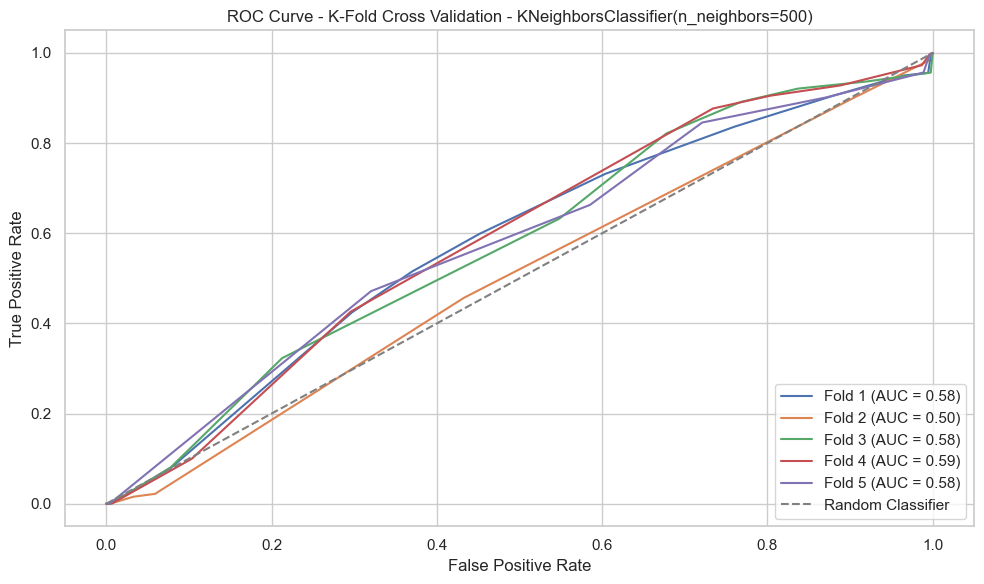

In [61]:
kfold_cross_validation(knn_model, x, y)

Average AUC: 0.50


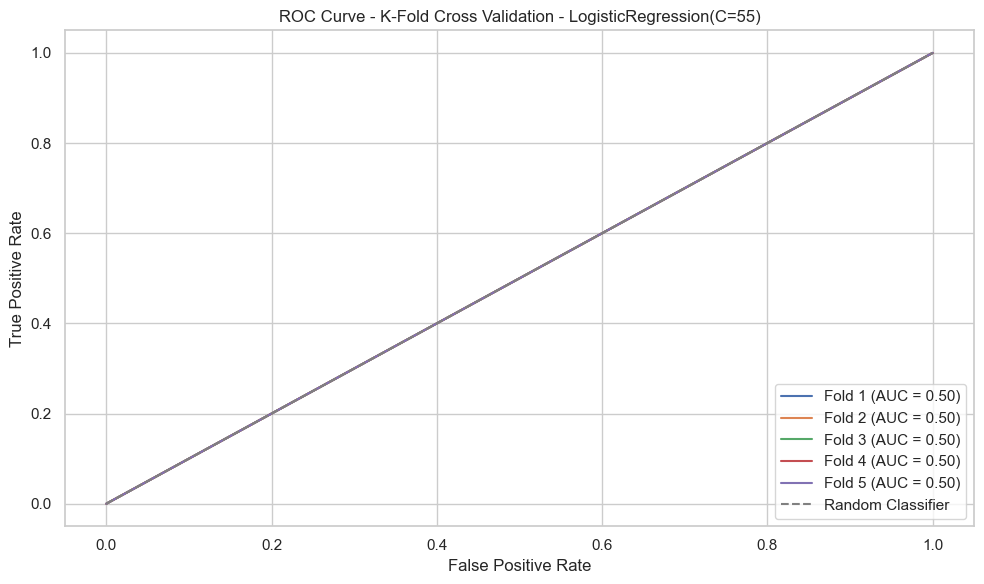

In [62]:
kfold_cross_validation(log_reg_model, x, y)

Average AUC: 0.93


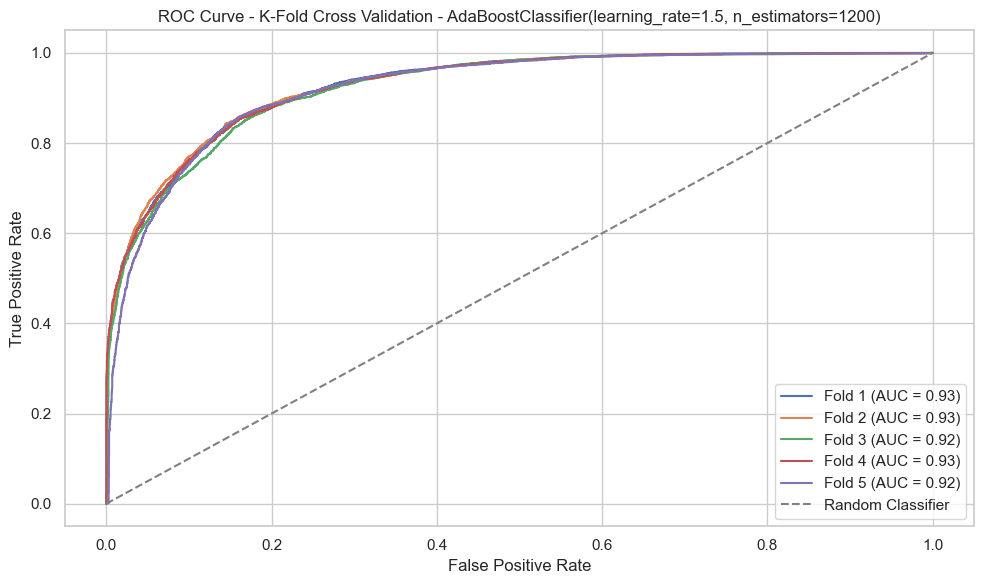

In [63]:
kfold_cross_validation(ada_model, x, y)

Average AUC: 0.52


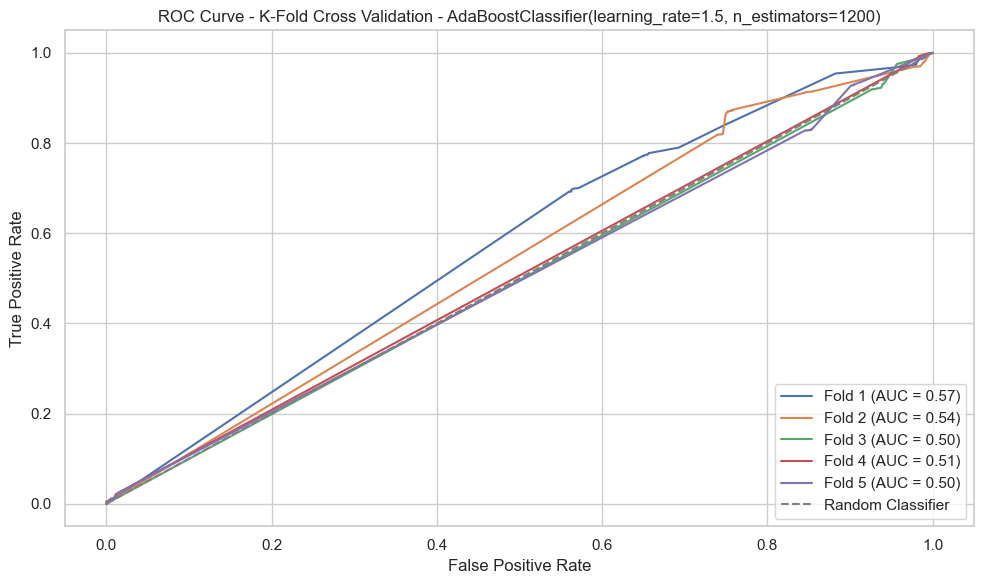

In [64]:
kfold_cross_validation_pca(ada_model_pca, x, y)

Average AUC: 0.50


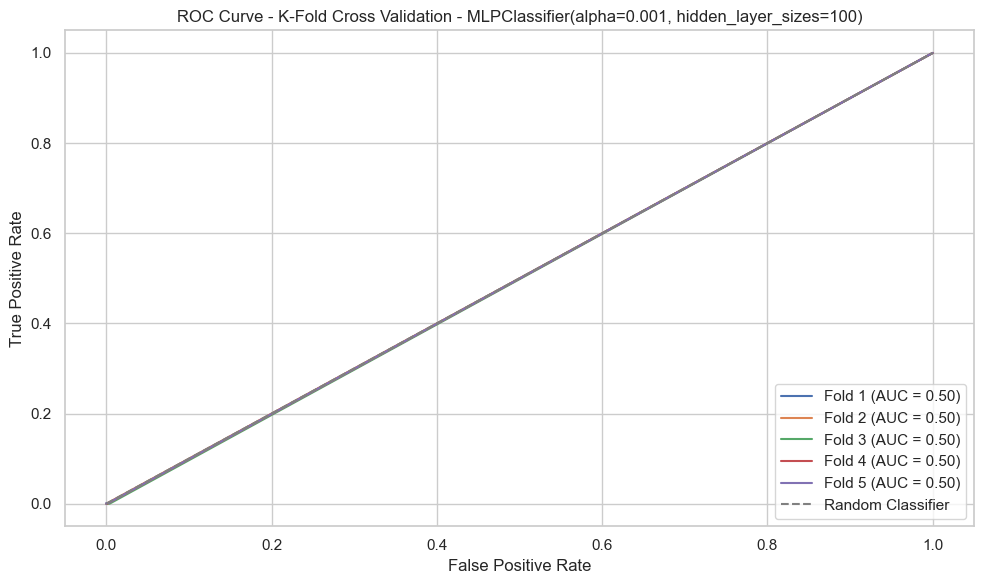

In [65]:
kfold_cross_validation(mlp_model, x, y)

**The model that got the best AUC score is AdaBoost. We will continue with it.**

### Confusion matrix

x_train.shape: (48000, 23), y_train.shape: (48000,), x_validation.shape: (12000, 23), y_validation.shape: (12000,)
accuracy = 0.8469166666666667
precision = 0.8242651657285803
recall = 0.8808688387635756


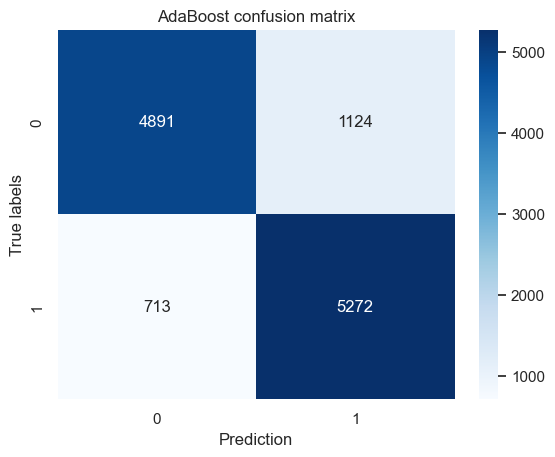

In [66]:
def confusion_matrix_plot(test_labels, test_prediction):
    cm = confusion_matrix(test_labels, test_prediction)
    tn, fp, fn, tp = cm.ravel()
    cm = np.array([[tn,fp],[fn,tp]])
    plt.title('AdaBoost confusion matrix')
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
    plt.xlabel("Prediction")
    plt.ylabel("True labels")
    

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}, \
x_validation.shape: {x_validation.shape}, y_validation.shape: {y_validation.shape}')

# Preprocessing
train_d, val_d = preprocessing(pd.concat([x_train, y_train], axis=1), x_validation)
train_d2, val_d2 = preprocessing2(train_d, val_d)
x_train_p, y_train_p = train_d2.drop('label', axis=1), train_d2['label']


# fitting the model to the chosen clasiffier 
ada_model.fit( x_train_p, y_train_p)

# predicting the model on the test
val_prediction = pd.Series(ada_model.predict(val_d2))
confusion_matrix_plot(y_validation,val_prediction)

#evaluation from confusion matrix
accuracy = accuracy_score(y_validation, val_prediction)
precision = precision_score(y_validation, val_prediction)
recall = recall_score(y_validation, val_prediction)

print("accuracy = " + str(accuracy) +"\nprecision = "+ str(precision) + "\nrecall = " +str(recall) )

#### Explanation

In the confusion matrix, the cells represent classifications made by the **Ada-Boost** model based on the true and predicted labels of the validation dataset.

- True Positive (TP): the number of files that are actually malicious as the prediction of the model. (bottom right) <br>
- False Positive (FP): the number of files that are actually not malicious but the prediction of the model is that they are malicious. (top right) <br>
- False Negative (FN): the number of files that are actually malicious but the prediction of the model is that they are not malicious. (bottom left) <br>
- True Negative (TN): the number of files that are actually not malicious as the prediction of the model. (top left) <br>

In this case, the model has an accuracy of 84.69%, indicating that it classified 84.69% of the samples correctly. <br>
In addition, the model has a precision of 82.42%, suggesting that when it predicts a sample as malicious, we can be 82.42% sure that it is correct. <br>
Moreover, the model has a recall of 88.08%, indicating that it correctly identifies 88.08% of the actual malicious samples. <br>

### Train VS Validation

In [67]:
def train_vs_validation(model, x_t, y_t, x_v, y_v):

    y_t_pred = model.predict(x_t)
    train_auc = roc_auc_score(y_t, y_t_pred)
    print(f'Train AUC score: {train_auc}')

    y_v_pred = model.predict(x_v)
    val_auc = roc_auc_score(y_v, y_v_pred)
    print (f"Validation AUC: {val_auc}")

    print (f"Performances gap: Train AUC score - Validation AUC = ", train_auc - val_auc)

train_vs_validation(ada_model, x_train_p, y_train_p, val_d2, y_validation)

Train AUC score: 0.8728015036112402
Validation AUC: 0.847001335425013
Performances gap: Train AUC score - Validation AUC =  0.025800168186227213


#### Overfitting

Overfitting can be detected when there is a significant difference between the AUC scores of the training and validation\test datasets (especially when the train is much higher). Another way to identify overfitting is by training the model on different data each time and observing the range of performances (as we did in K-fold Cross Validation), when a wide range suggests overfitting. By customizing the K-Fold Cross Validation process to the specific data, we can estimate if the model is truly overfitted.
When we did K-fold cross validation, the range of performances was narrow (similar for each fold), indicating no overfitting. But because the train AUC score is higher than the validation’s this might imply a bit of overfitting. Although the performance gap is not that high so we think the overfitting is not dramatic.
To simulate real-world scenarios, the preprocessing steps are performed on the training data, and the validation data's preprocessing aligns with the values derived from the training data, without incorporating any learning from the validation set. This approach ensures that decision making is based solely on the training data, considering the potential issues of overfitting. Additionally, to try preventing overfitting and reducing the learning of noise, we used measures such as dimensionality reduction, handling categorical features and removing suspected outliers in the preprocessing of the training data.


### Feature importance

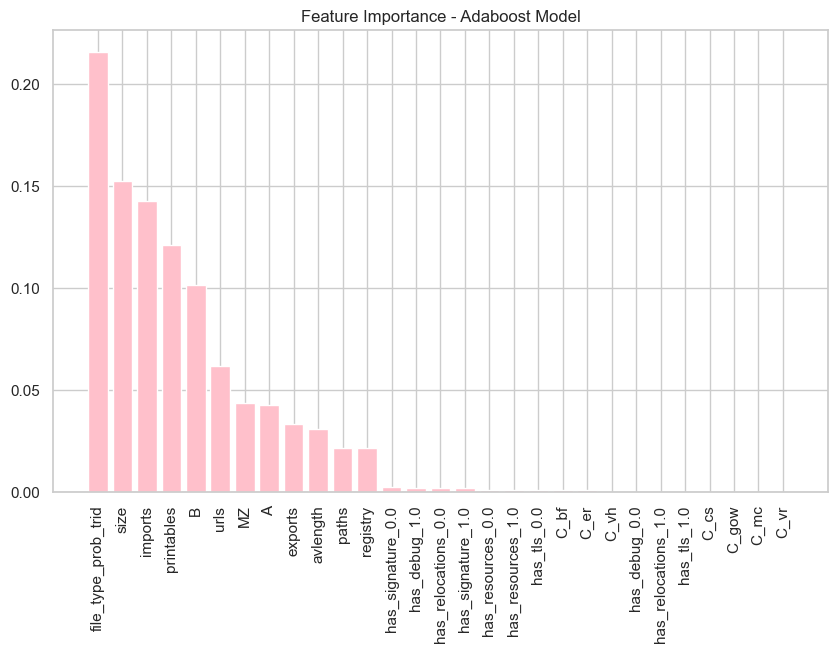

In [68]:
def feature_importance(model, x_t, x_v, y_v):

    fpr, tpr, thresholds = roc_curve(y_v, model.predict_proba(x_v)[:,1])
    auc(fpr, tpr)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = x_t.columns[indices]

    plt.figure(figsize=(10,6))
    plt.title("Feature Importance - Adaboost Model")
    plt.bar(range(x_t.shape[1]), importances[indices], color='pink', align="center")
    plt.xticks(range(x_t.shape[1]), names, rotation=90)
    plt.show()

feature_importance(ada_model,x_train_p, val_d2, y_validation)

As we can see, the TOP 3 important features are: file_type_prob_trid, size and imports.

file_type_prob_trid (1st place): The probability of the file being a certain file type is highly relevant in determining whether a file is malicious. It makes sense that the type of the file is connected to the indication of a malicious file. For example, malicious files might appear more as a certain file type.

size (2nd place): The size of the file on disk can provide valuable insights into its potential being malicious. Large files may contain malicious code, while very small files may indicate compressed malware. For example, we can try to identify files that are outside of the expected size range for a given file type.

imports (3rd place):
The number of imported functions. We assume that malicious files can contain some functions not found in not malicious files or contain more/less functions. 


# Part 5


## Prediction

In [69]:
def prediction(model,x_train,y_train,x_test,test_raw):

    predictions = model.fit(x_train,y_train).predict_proba(x_test)[:,1]
    predictions = pd.DataFrame(predictions, index = test_raw['sha256'])
    predictions.index.names = ['sha256']
    predictions.rename(columns={0:'predict_proba'}, inplace=True)
    predictions.to_csv('results_30.csv')

prediction(ada_model, data2, labels2, test_preprocessed_2, test_data_copy)


In [70]:
#checking the prediction on the train data

"""def prediction2(model,x_train,y_train,x_test, test_raw):

    predictions2 = model.fit(x_train,y_train).predict_proba(x_test)[:,1]
    predictions2 = pd.DataFrame(predictions2)
    predictions2.rename(columns={0:'predict_proba'}, inplace=True)
    predictions2.to_csv('results_train30.csv')

prediction2(ada_model, data2, labels2, data2, train_data_copy)"""

"def prediction2(model,x_train,y_train,x_test, test_raw):\n\n    predictions2 = model.fit(x_train,y_train).predict_proba(x_test)[:,1]\n    predictions2 = pd.DataFrame(predictions2)\n    predictions2.rename(columns={0:'predict_proba'}, inplace=True)\n    predictions2.to_csv('results_train30.csv')\n\nprediction2(ada_model, data2, labels2, data2, train_data_copy)"

# Pipeline - click excecute cell and below

In [75]:
#Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score,roc_curve, RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier


In [76]:
#functions

def preprocessing(train_data,test_data):

    #### train preprocessing ####

    train_data_reduced = train_data.copy()

    # outliers
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["imports"] >= 2000].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["paths"] >= 200].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["MZ"] >= 1000].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["exports"] >= 5000].index)
    train_data_reduced = train_data_reduced.drop(train_data_reduced[train_data_reduced["urls"] >= 1000].index)

    # IQR
    log_transform_cols = ['size', 'vsize', 'numstrings', 'printables']
    train_data_reduced_wlog = train_data_reduced.copy()

    for col in log_transform_cols:
        train_data_reduced_wlog[col] = np.log(train_data_reduced_wlog[col])

    log_transform_cols.append('A')

    outliers_removed = False

    for col in log_transform_cols:
        if not outliers_removed:
            Q1 = train_data_reduced_wlog[col].quantile(0.25)
            Q3 = train_data_reduced_wlog[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            upper_array = np.where(train_data_reduced_wlog[col] >= upper)[0]
            lower_array = np.where(train_data_reduced_wlog[col] <= lower)[0]
            
            train_data_reduced_wlog = train_data_reduced_wlog.loc[~train_data_reduced_wlog.index.isin(upper_array)]
            train_data_reduced_wlog = train_data_reduced_wlog.loc[~train_data_reduced_wlog.index.isin(lower_array)]
            
            outliers_removed = True

    #features removal
    #train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["registry"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["symbols"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["sha256"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["numstrings"])
    train_data_reduced_wlog = train_data_reduced_wlog.drop(columns=["file_type_trid"])
    train_data_reduced_wlog = train_data_reduced_wlog.reset_index(drop=True)

    # Separate numerical and categorical features
    numerical_cols = [ 'size', 'vsize', 'imports', 'exports', 'paths', 'urls', 'MZ', 'printables', 'avlength', 'file_type_prob_trid', 'A', 'B', 'registry']
    categorical_cols = ['has_debug', 'has_relocations', 'has_resources', 'has_signature' ,'has_tls', 'C']

    train_data_fill_na = train_data_reduced_wlog.copy()

    #Fill NA numeric
    for i in numerical_cols:
        i_mean = train_data_reduced_wlog[i].mean()
        train_data_fill_na[i].fillna(i_mean, inplace=True) 

    #Fill NA categorical
    for j in categorical_cols:
        most_frequent_value =train_data_reduced_wlog[j].value_counts().idxmax()
        train_data_fill_na[j].fillna(most_frequent_value, inplace=True)
    
    # Normalize numerical data
    scaler = MinMaxScaler()
    train_data_norm = train_data_fill_na.copy()
    train_data_norm[numerical_cols] = pd.DataFrame(scaler.fit_transform(train_data_fill_na[numerical_cols]))

    # dealing with categorical data
    encoder = OneHotEncoder(handle_unknown='ignore')
    train_data_copy_encoded = (encoder.fit_transform(train_data_fill_na[categorical_cols]))
    train_data_copy_encoded_df = pd.DataFrame(train_data_copy_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    train_data_norm = pd.concat([train_data_norm.drop(categorical_cols, axis=1).reset_index(drop=True), train_data_copy_encoded_df], axis=1)

    preprocessed_train = train_data_norm
    

    #### test/validation preprocessing ####

    x_test_removed = test_data.copy()

    #x_test_removed = x_test_removed.drop(columns=["registry"]) 
    x_test_removed = x_test_removed.drop(columns=["symbols"])
    x_test_removed = x_test_removed.drop(columns=["sha256"])
    x_test_removed = x_test_removed.drop(columns=["numstrings"]) 
    x_test_removed = x_test_removed.drop(columns=["file_type_trid"])
    x_test_removed = x_test_removed.reset_index(drop=True)

    x_test_fill_na = x_test_removed.copy()

    #Fill NA numeric
    for i in numerical_cols:
        i_mean = train_data_reduced_wlog[i].mean()
        x_test_fill_na[i].fillna(i_mean, inplace=True) 

    #Fill NA categorical
    for j in categorical_cols:
        most_frequent_value =train_data_reduced_wlog[j].value_counts().idxmax()
        x_test_fill_na[j].fillna(most_frequent_value, inplace=True)

    # Normalize numerical data
    test_norm = x_test_fill_na.copy()
    test_norm[numerical_cols] = pd.DataFrame(scaler.transform(x_test_fill_na[numerical_cols]))

    # dealing with categorical data
    test_encoded = (encoder.transform(x_test_fill_na[categorical_cols]))
    test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    test_norm_all = pd.concat([test_norm.drop(categorical_cols, axis=1).reset_index(drop=True), test_encoded_df], axis=1)

    preprocessed_test = test_norm_all
    
    return preprocessed_train, preprocessed_test




def preprocessing2(train_preprocessed, test_preprocessed):
    train_preprocessed = train_preprocessed.drop(columns=["vsize"])
    test_preprocessed = test_preprocessed.drop(columns=["vsize"])
    return train_preprocessed, test_preprocessed



def adaboost(x_train, y_train): #without fitting, just returning the model with best params

    #this is the gridsearch code
    """adaboost_model = AdaBoostClassifier()
    param_ada = {'n_estimators': [1000,1100,1200], 'learning_rate': [ 1.0,1.5,2.0]}
    grid_ada = GridSearchCV(adaboost_model, param_ada, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1).fit(x_train, y_train)
    best_params_ada = grid_ada.best_params_
    ada_model_best = AdaBoostClassifier(**best_params_ada)"""

    #if you want to run gridsearch delete the next code line and run the grid search code above

    ada_model_best = AdaBoostClassifier(algorithm = 'SAMME.R',
                                        base_estimator= 'deprecated',
                                        estimator= None,
                                        learning_rate= 1.5,
                                        n_estimators= 1200,
                                        random_state= None)
    best_params_ada = None

    return ada_model_best, best_params_ada




def kfold_cross_validation(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    auc_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 6))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        x_train_fold1, x_test_fold1 = X.iloc[train_index], X.iloc[test_index]
        y_train_fold1, y_test_fold1 = y.iloc[train_index], y.iloc[test_index]


        # Preprocessing
        train_data1, test_data1 = preprocessing(pd.concat([x_train_fold1, y_train_fold1], axis=1), x_test_fold1)
        train_data, test_data = preprocessing2(train_data1, test_data1)
        x_train_fold, y_train_fold = train_data.drop('label', axis=1), train_data['label']



        model.fit(x_train_fold, y_train_fold)
        y_prob_fold = model.predict_proba(test_data)[:, 1]

        auc_score = roc_auc_score(y_test_fold1, y_prob_fold)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_test_fold1, y_prob_fold)
        plt.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {auc_score:.2f})")

    mean_auc = np.mean(auc_scores)
    print(f"Average AUC: {mean_auc:.2f}")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - K-Fold Cross Validation')
    plt.legend(loc='lower right')
    plt.tight_layout()

    plt.show()




def confusion_matrix_plot(test_labels, test_prediction):
    cm = confusion_matrix(test_labels, test_prediction)
    tn, fp, fn, tp = cm.ravel()
    cm = np.array([[tn,fp],[fn,tp]])
    plt.title('AdaBoost confusion matrix')
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
    plt.xlabel("Prediction")
    plt.ylabel("True labels")




def train_vs_validation(model, x_t, y_t, x_v, y_v):

    y_t_pred = model.predict(x_t)
    train_auc = roc_auc_score(y_t, y_t_pred)
    print(f'Train AUC score: {train_auc}')

    y_v_pred = model.predict(x_v)
    val_auc = roc_auc_score(y_v, y_v_pred)
    print (f"Validation AUC: {val_auc}")

    print (f"Performances gap: Train AUC score - Validation AUC = ", train_auc - val_auc)




def prediction(model,x_train,y_train,x_test,test_raw):

    predictions = model.fit(x_train,y_train).predict_proba(x_test)[:,1]
    predictions = pd.DataFrame(predictions, index = test_raw['sha256'])
    predictions.index.names = ['sha256']
    predictions.rename(columns={0:'predict_proba'}, inplace=True)
    predictions.to_csv('results_30.csv')

In [77]:
def pipeline(train_file, test_file) -> None:
    
    #reading the files
    train_data = pd.read_csv(train_file)
    train_data_copy = train_data.copy()
    test_data = pd.read_csv(test_file)
    test_data_copy = test_data.copy()

    #preprocessing real train and test data
    train_preprocessed, test_preprocessed = preprocessing(train_data_copy,test_data_copy)
    train_preprocessed_2, test_preprocessed_2 = preprocessing2(train_preprocessed, test_preprocessed)

    #splitting features and labels
    labels2 = train_preprocessed_2['label']
    data2 = train_preprocessed_2.drop('label',axis=1)

    #modeling on real train
    ada_model, best_params_ada = adaboost(data2,labels2)
    x, y = train_data_copy.drop('label', axis=1), train_data_copy['label']

    #k-fold cv
    kfold_cross_validation(ada_model, x, y)

    #creating train and validation
    x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.2, random_state = 42)
    print(f'x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}, \
    x_validation.shape: {x_validation.shape}, y_validation.shape: {y_validation.shape}')

    #Preprocessing train and validation
    train_d, val_d = preprocessing(pd.concat([x_train, y_train], axis=1), x_validation)
    train_d2, val_d2 = preprocessing2(train_d, val_d)
    x_train_p, y_train_p = train_d2.drop('label', axis=1), train_d2['label']

    #fitting the model to the chosen clasiffier 
    ada_model.fit(x_train_p, y_train_p)

    #predicting the model on the validation and evaluating
    val_prediction = pd.Series(ada_model.predict(val_d2))
    confusion_matrix_plot(y_validation,val_prediction)
    train_vs_validation(ada_model, x_train_p, y_train_p, val_d2, y_validation)
    
    #predicting the model on the test
    prediction(ada_model, data2, labels2, test_preprocessed_2, test_data_copy)

In [78]:
%%capture
pipeline("train.csv", "test.csv")